# Auriga Read Example
Notebook showing some AurigaRead and Pynbody things. See Pynbody docs for more! 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from AurigaRead import AuPynbody

## Load Snapshot
Contains stars, darkmatter, gas and wind.
We select only members of the main halo

In [2]:
Au6=AuPynbody(halo_n=6,snap=127)

/Users/users/callingham/miniforge3/envs/py10/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:610: RuntimeWarning: No unit information found in GadgetHDF file. Using gadget default units.
  warnings.warn("No unit information found in GadgetHDF file. Using gadget default units.", RuntimeWarning)


In [3]:
main_halo = Au6.halos()[0] #FoF =0
main_subhalo = Au6.halos()[0].sub[0] #FoF =0 Subhalo=0

## Selecting Stars and Properties
Note this package handles the sharp edge of Auriga wind particles being saved as stellar type with a negative formation time. 

The full particle family can be found with:  
stars_and_wind = main_halo.s

In [4]:
stars = main_halo.stars
print(stars)
print(stars.all_keys())

<SimSnap "/data/users/callingham/data/AurigaData/level4/Original/halo_6/snapdir_127/snapshot_127:halo_0::star:indexed" len=1663601>
['u', 'g_mag', 'g_lum_den', 'z_mag', 'z_lum_den', 'y_mag', 'y_lum_den', 'r', 'rxy', 'vr', 'v2', 'vt', 'ke', 'te', 'j', 'j2', 'jz', 'vrxy', 'vcxy', 'vphi', 'vtheta', 'v_mean', 'v_disp', 'v_curl', 'vorticity', 'v_div', 'age', 'theta', 'alt', 'az', 'cs', 'mu', 'u', 'temp', 'tform', 'iord_argsort', 'smooth', 'rho', 'C_H', 'Fe_H', 'N_H', 'O_H', 'Ne_H', 'Mg_H', 'Si_H', 'C_Fe', 'N_Fe', 'O_Fe', 'Ne_Fe', 'Mg_Fe', 'Si_Fe', 'alpha_Fe', 'R', 'angle_phi', 'vR', 'vT', 'E_sim', 'U_sim', 'Lvec', 'Lx', 'Ly', 'Lz', 'Lp', 'En', 'touch_a_ind', 'touch_z0ids', 'touch_r_sat', 'touch_U_sim', 'touch_E_sim', 'sub_id', 'group_id', 'U', 'E', 'L', 'Lperp', 'peri', 'apo', 'ecc', 'RcircE', 'RcircL', 'circ', 'Tcirc', 'Lcirc_E', 'JR', 'Jz', 'Jphi', 'AR', 'Az', 'Aphi', 'OR', 'Oz', 'Ophi', 'Jtot', 'J_diamond', 'Jphi_Jtot', 'JR_Jtot', 'Jz_Jtot', 'mass', 'metals', 'GFM_StellarPhotometrics', '

/Users/users/callingham/miniforge3/envs/py10/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:432: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


Properties are loaded into a SimArray. These are fancier than numpy arrays, holding things  like units, but are also slower to repeatedly access for subselections (note in auriga stars are already a subselection). You can return them to numpy arrays with a "x.v" (note this is on Tom's Pynbody, on the usual its .view(np.array)"

In [5]:
x_sim_array = stars["x"]
print(type(x_sim_array))
print(x_sim_array)
print(x_sim_array.units)

<class 'pynbody.array.IndexedSimArray'>
[-2.0894402e-01 -1.7290705e-01  1.3383079e-01 ... -2.7880960e+02
 -1.7351576e+02 -2.7764917e+02]
kpc


In [6]:
x_numpy = stars["x"].v
print(type(x_numpy))

<class 'numpy.ndarray'>


## Orientation
This package automatically lazily orientates to main halo and disc, unless the orientate=False flag is passed:

Au6 = AuPynbody(halo_n=6,snap=127,orientate=False)

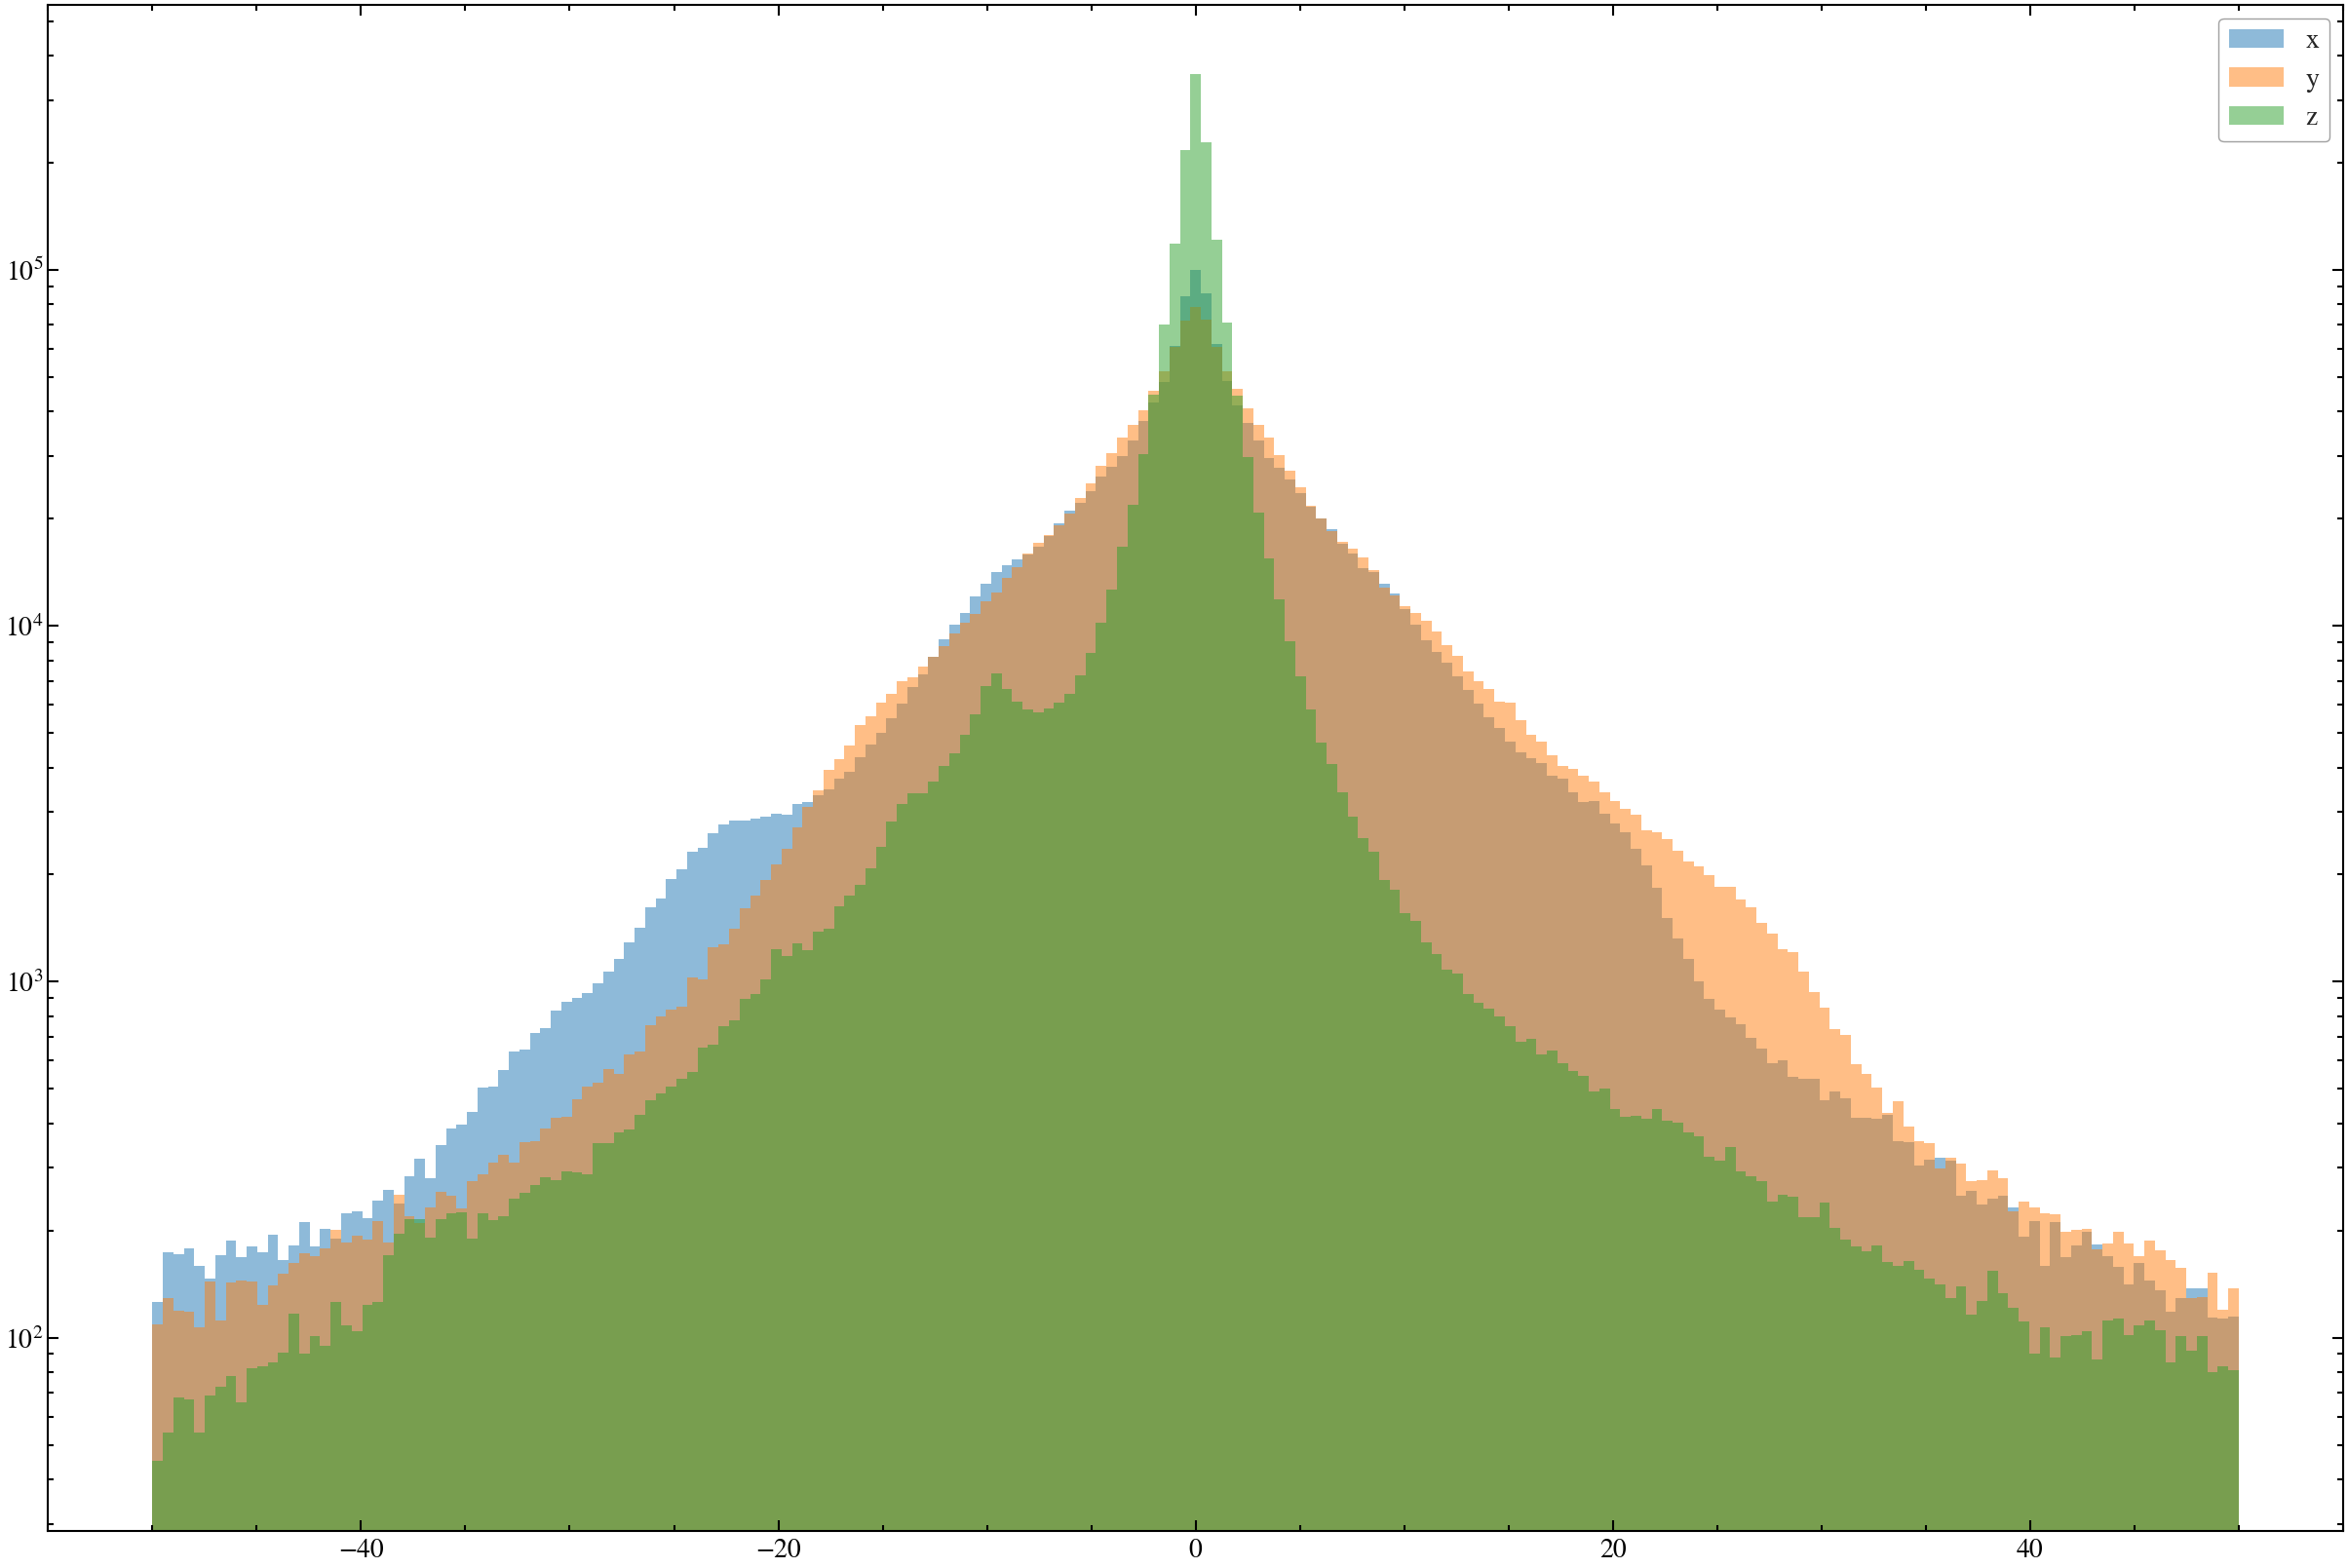

In [7]:
pos_bins = np.linspace(-50,50,200)
plt.figure()
for xkey in ["x","y","z"]:
    plt.hist(stars[xkey],bins=pos_bins,alpha=0.5,label=xkey)
plt.legend()
plt.yscale("log")
plt.show()

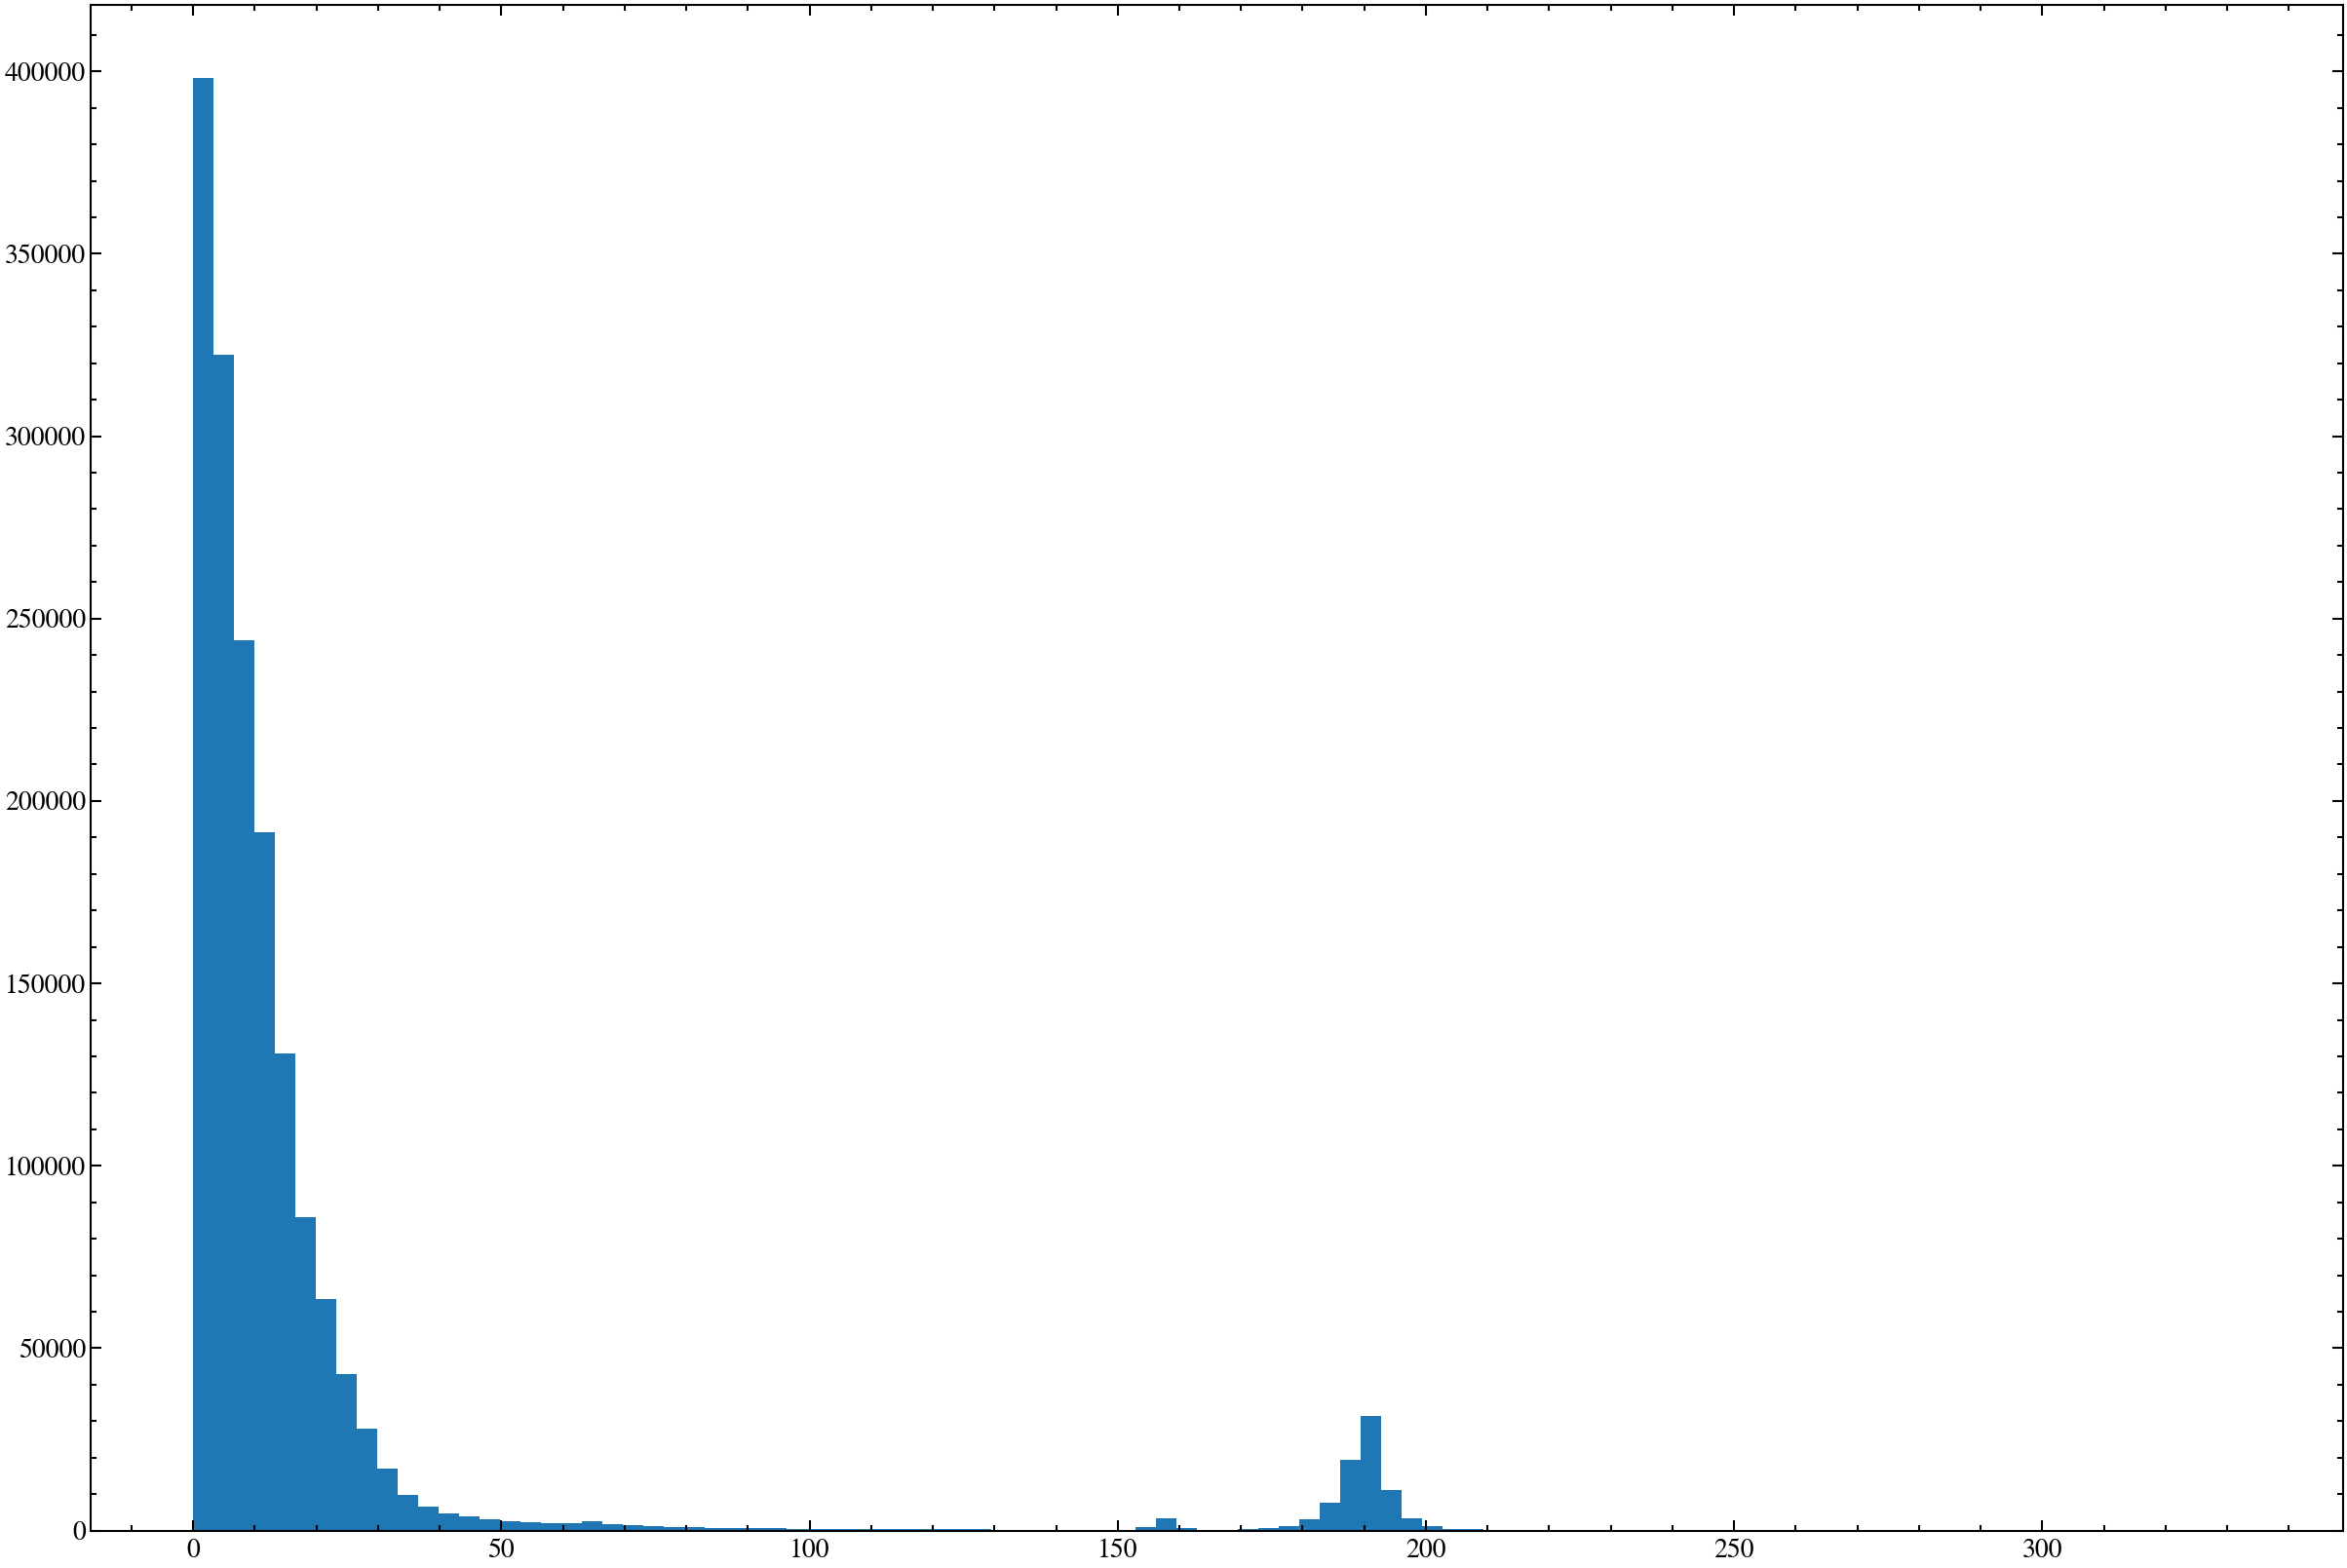

In [8]:
R = stars["R"].v
plt.figure()
plt.hist(R[R<500],bins=100)
plt.show()

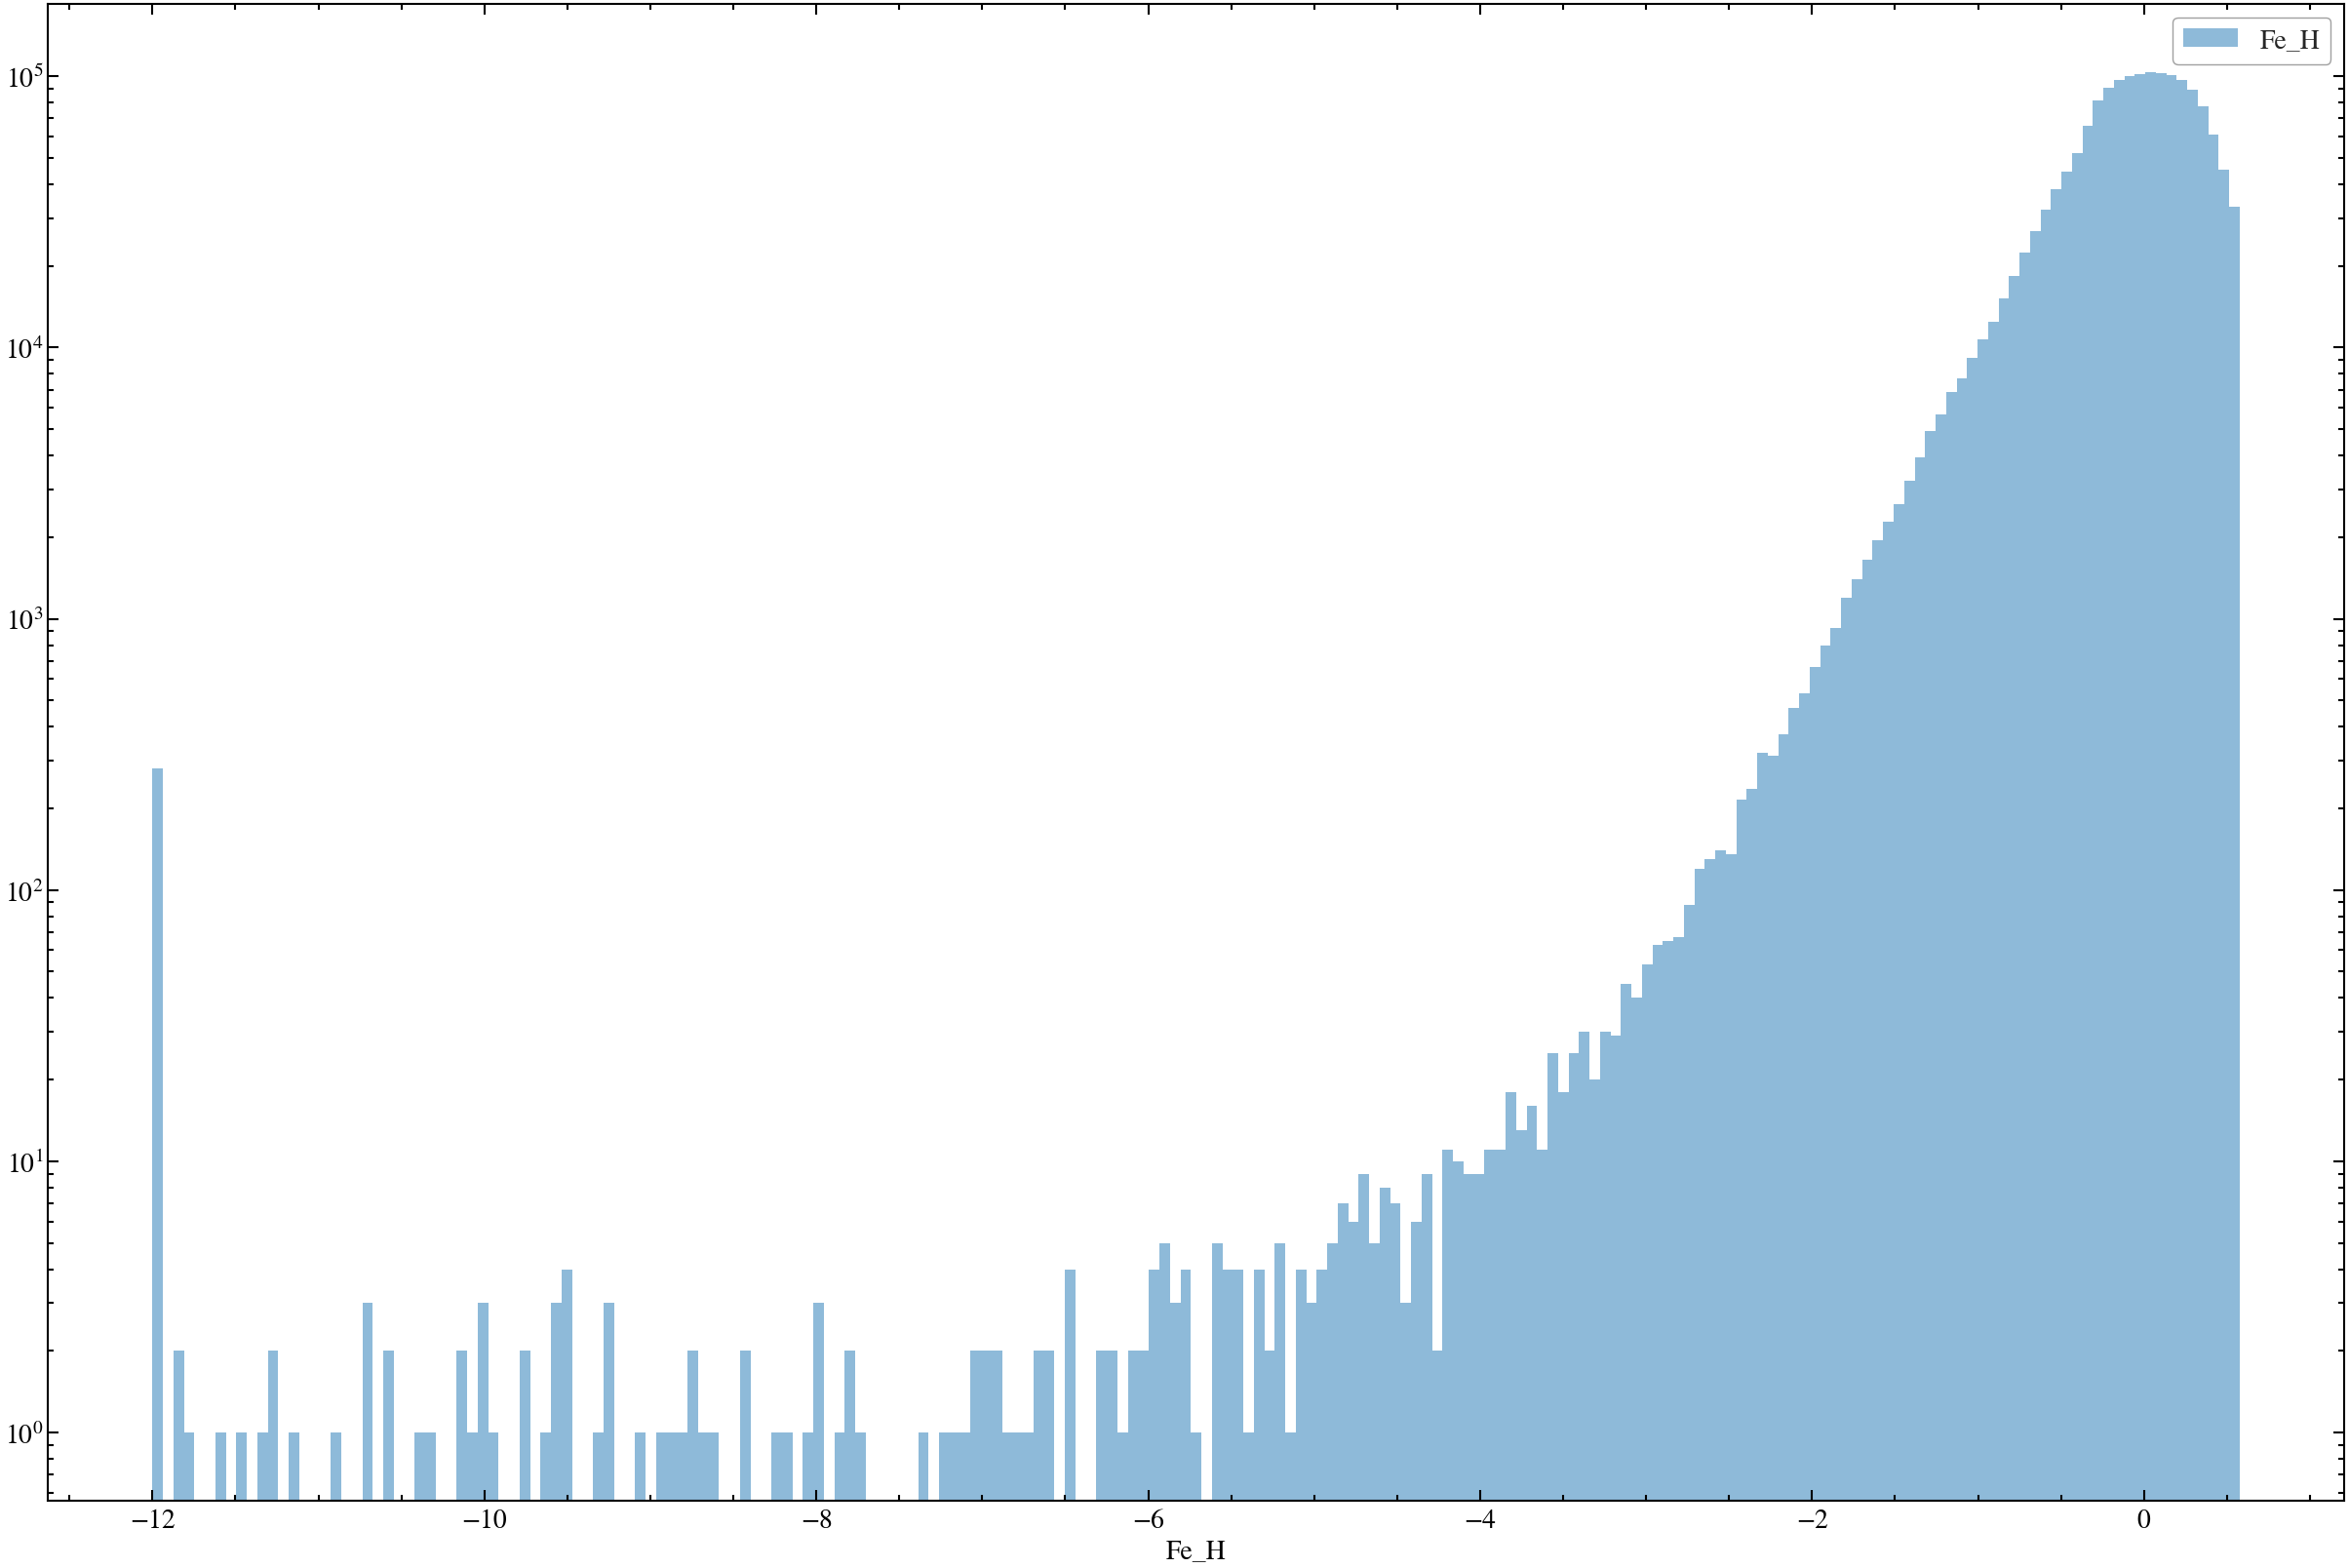

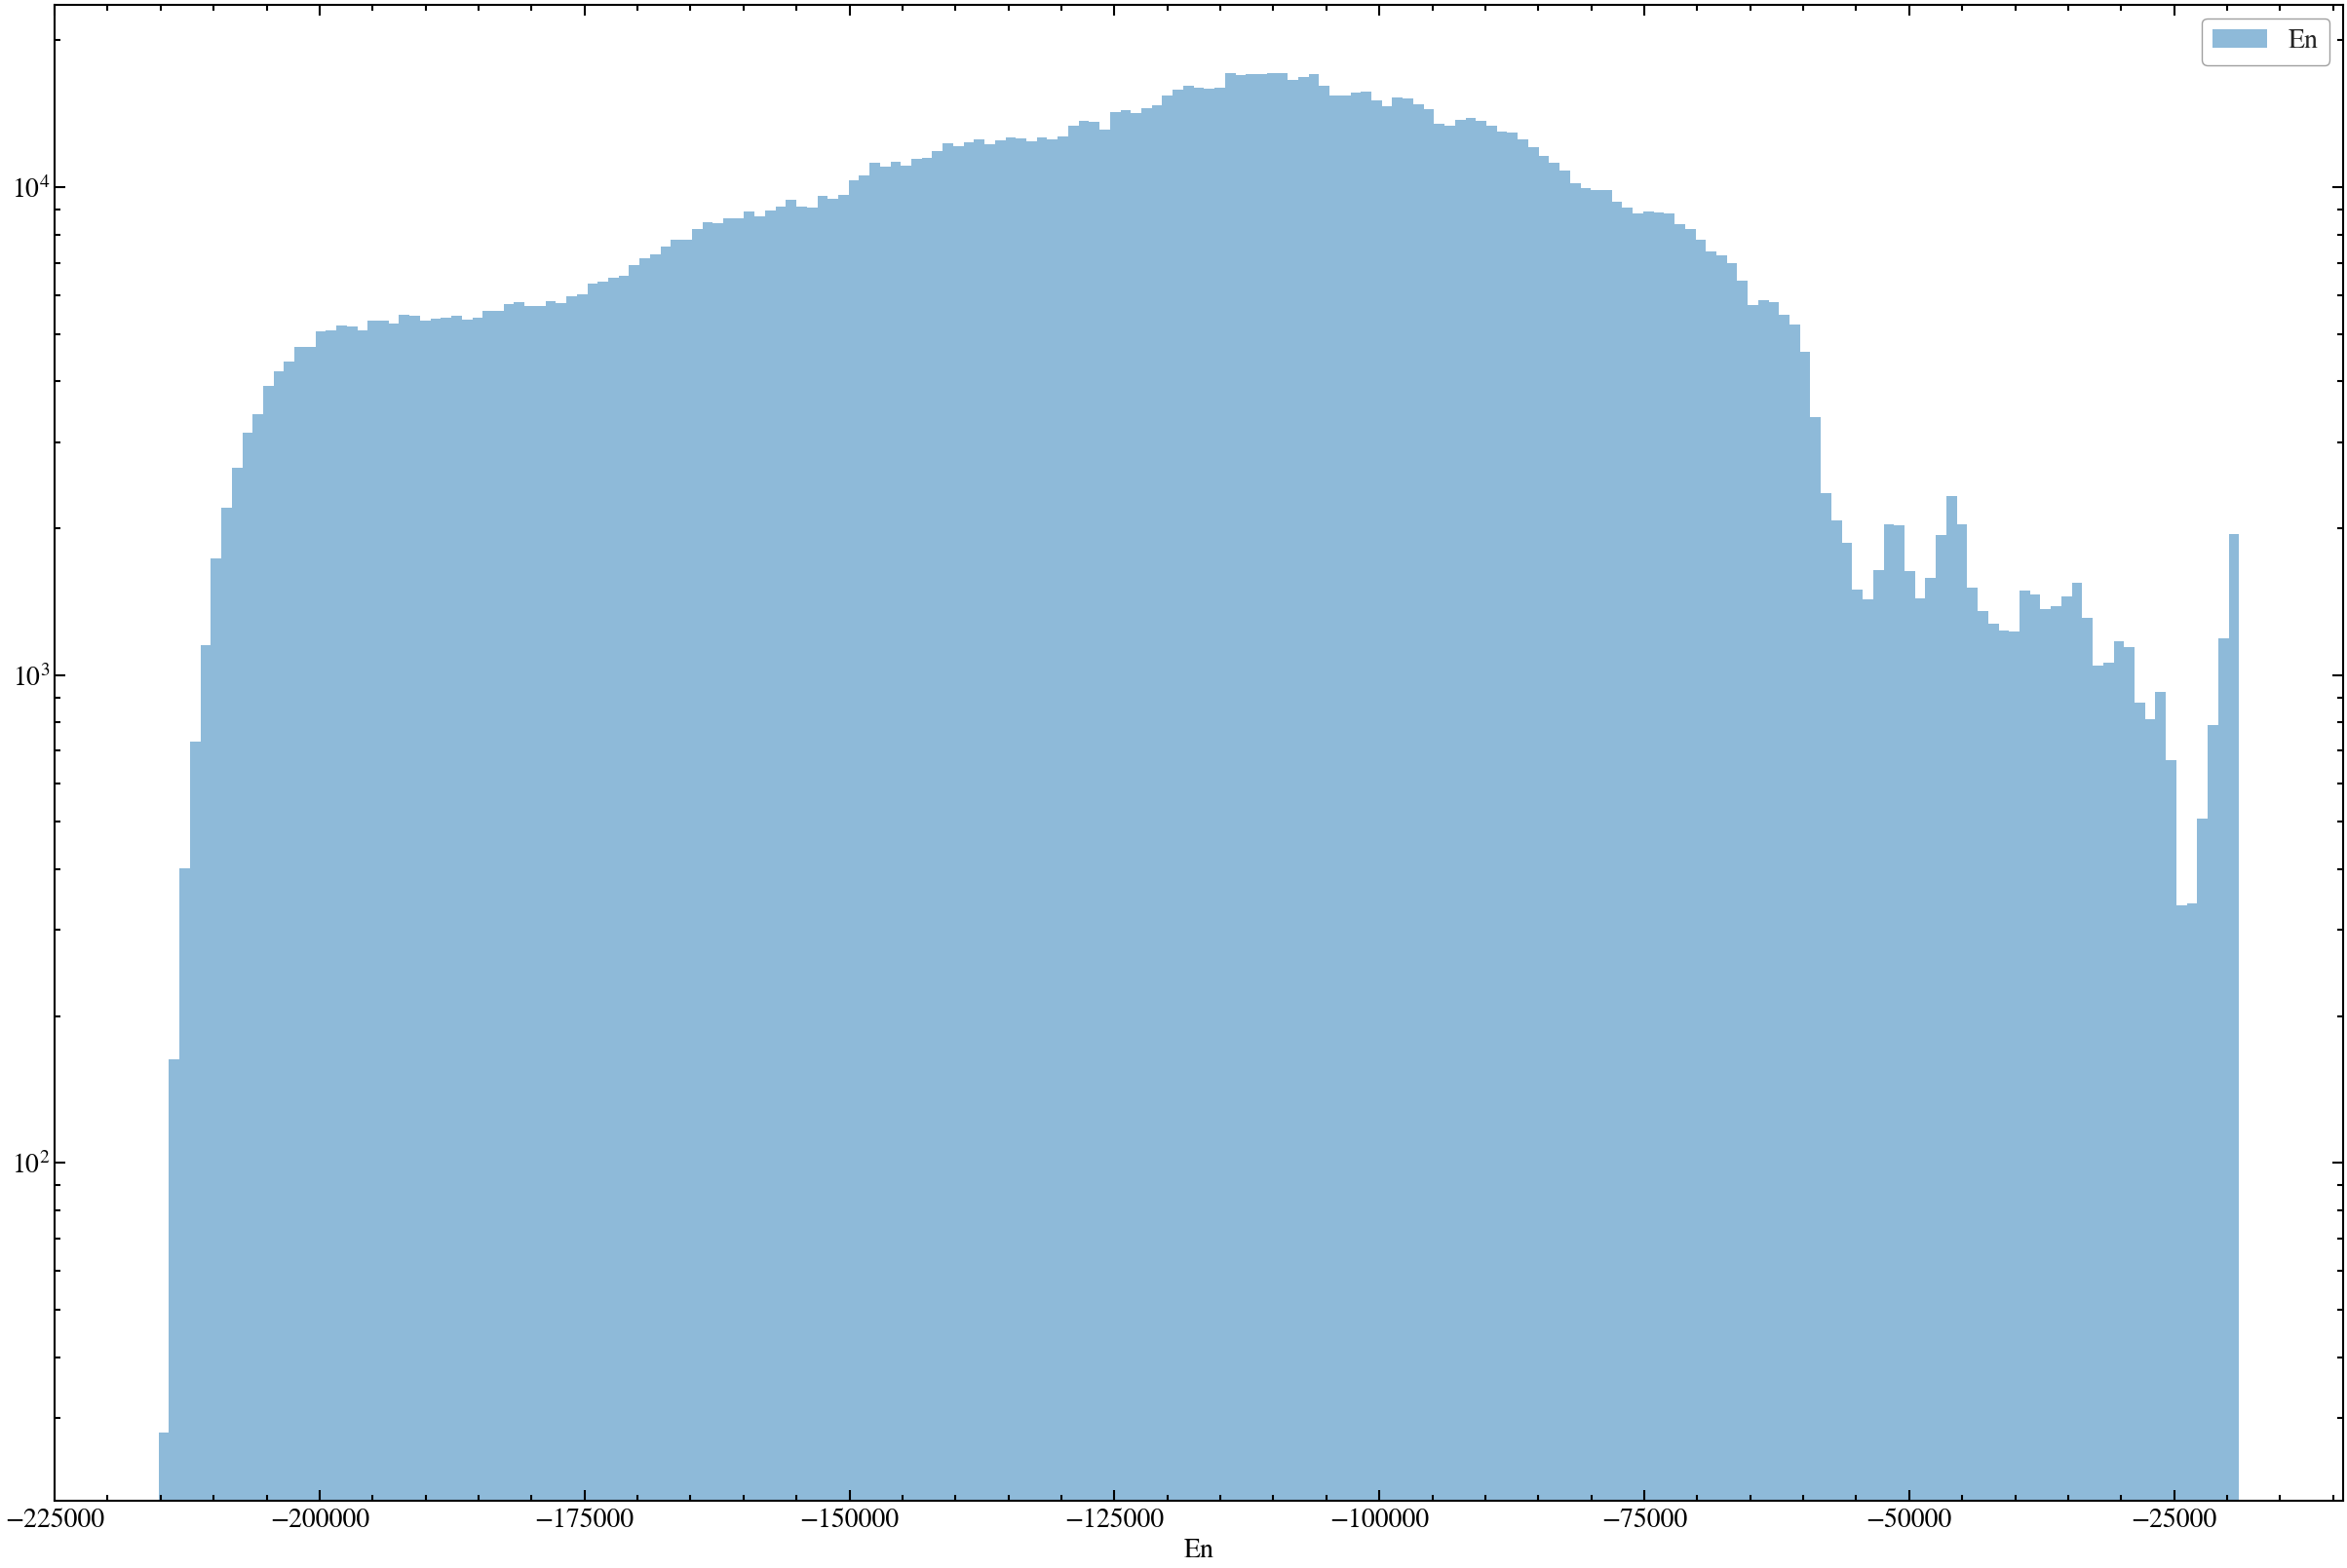

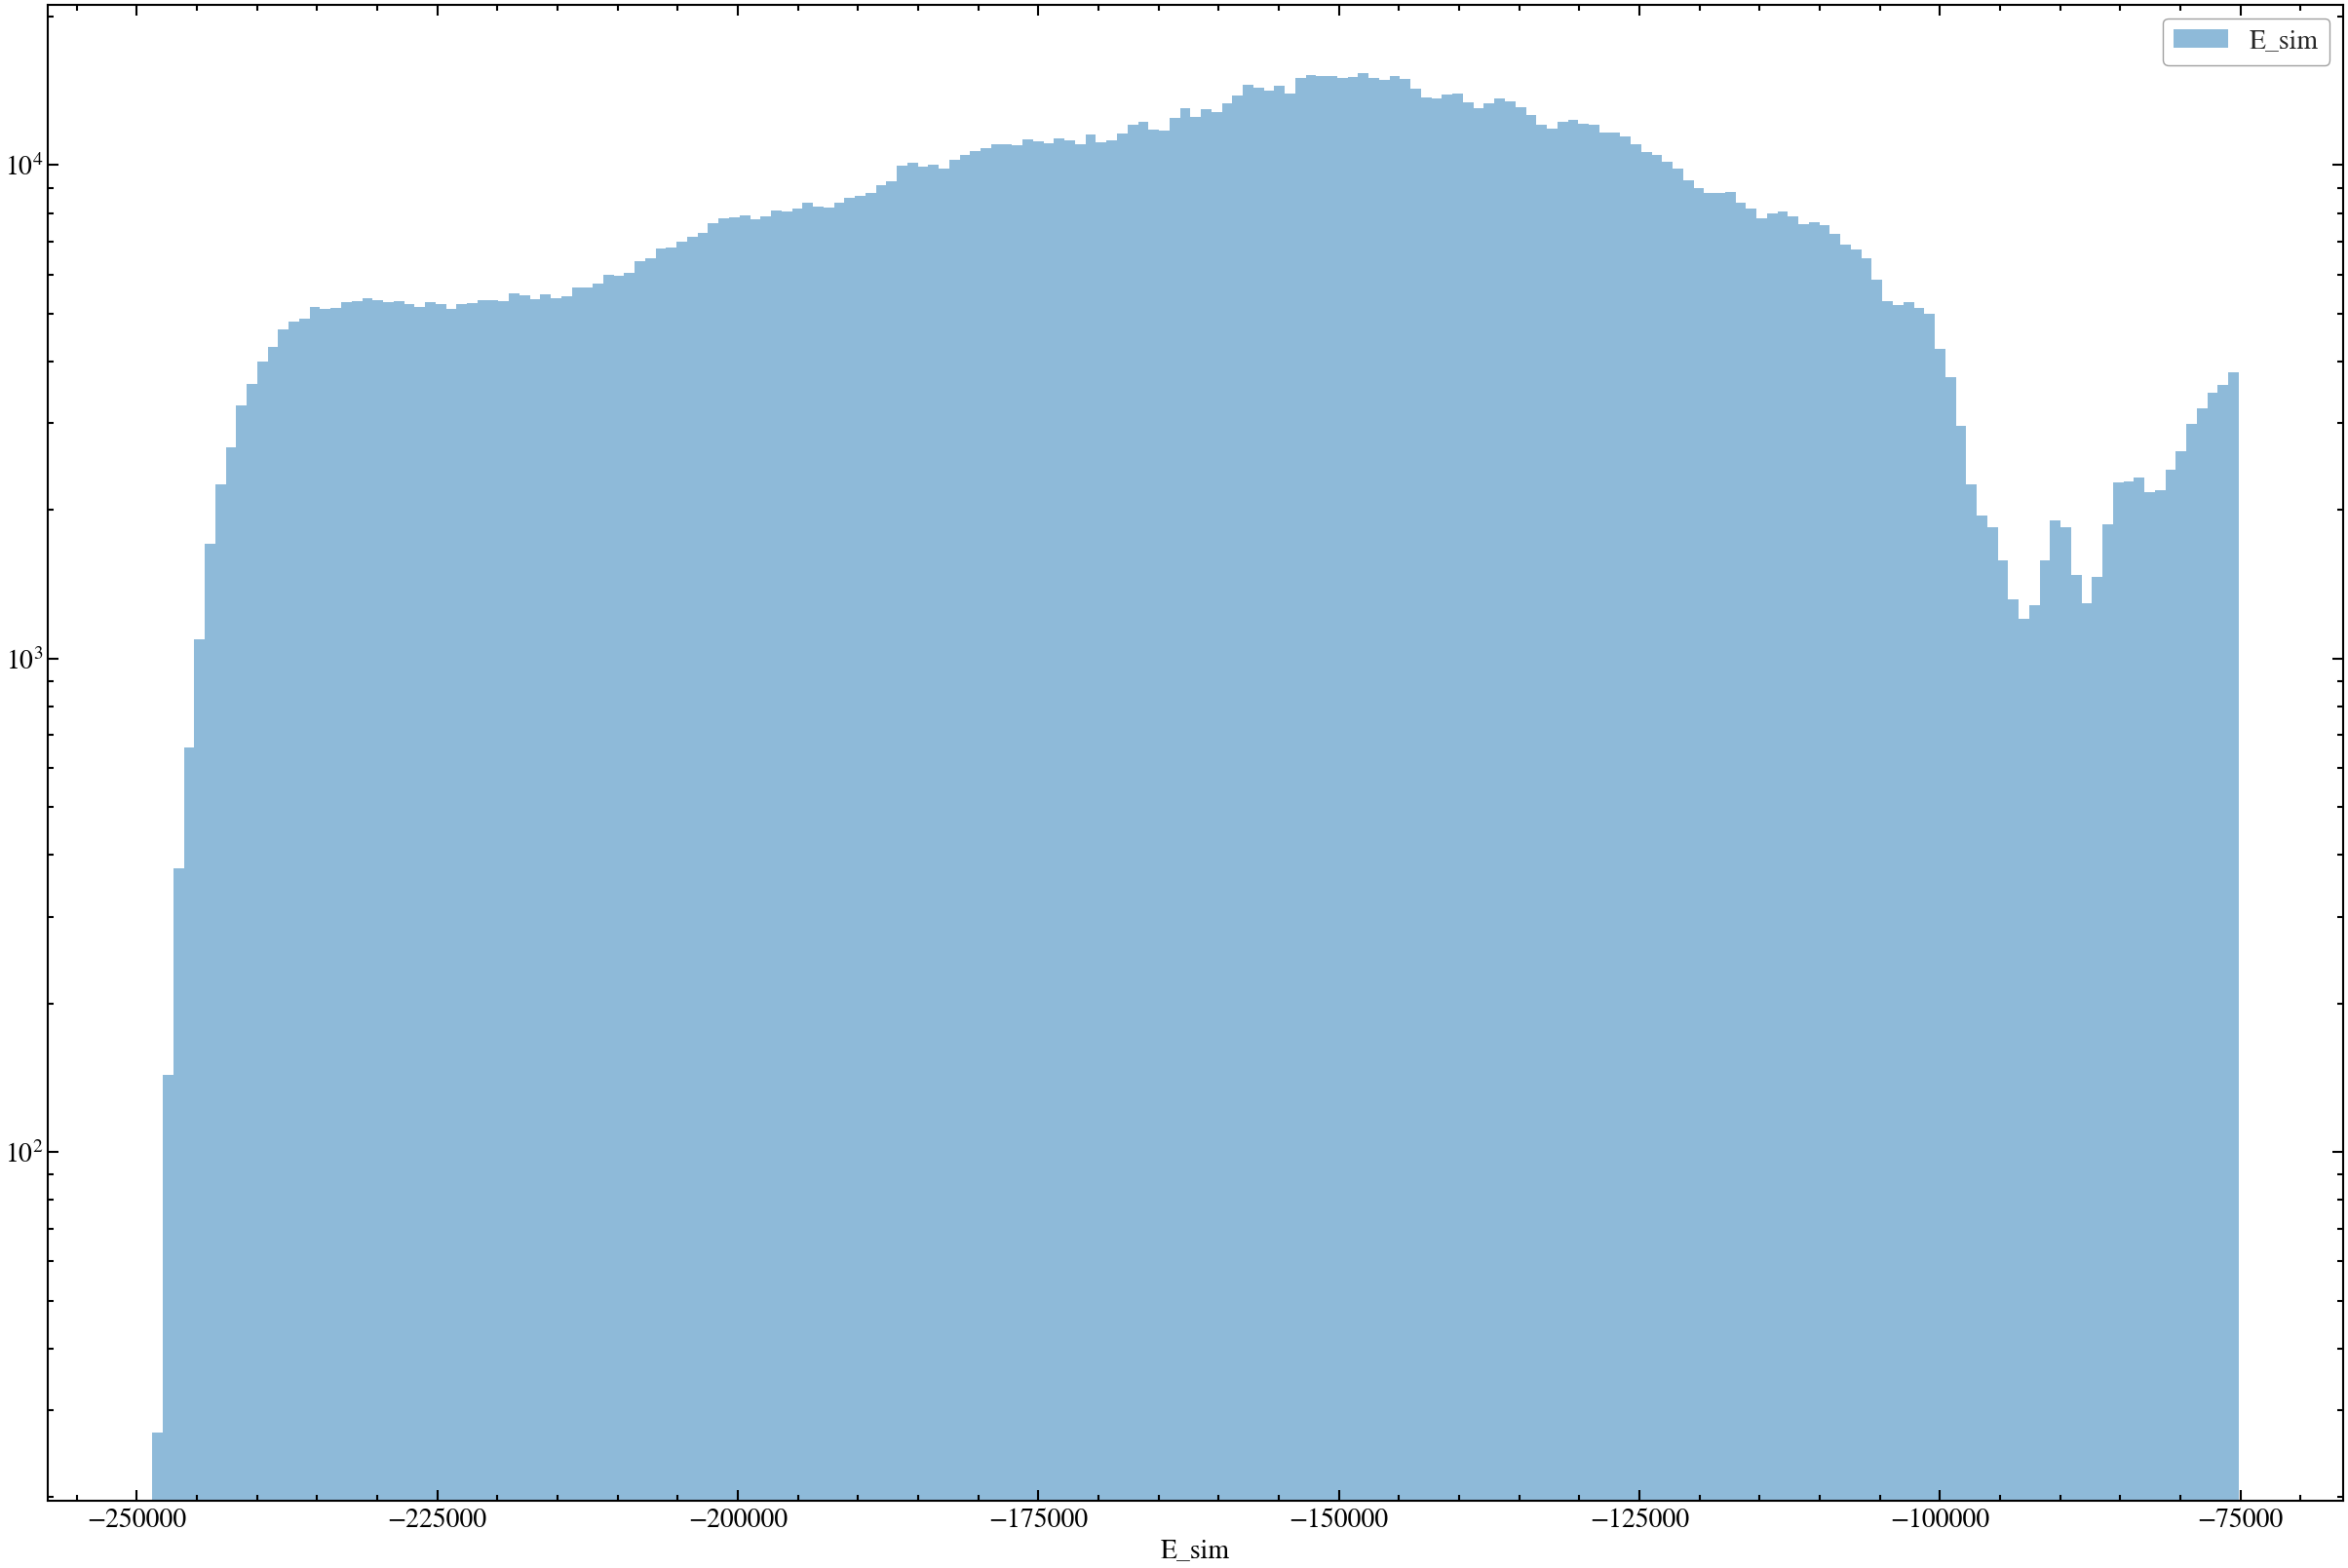

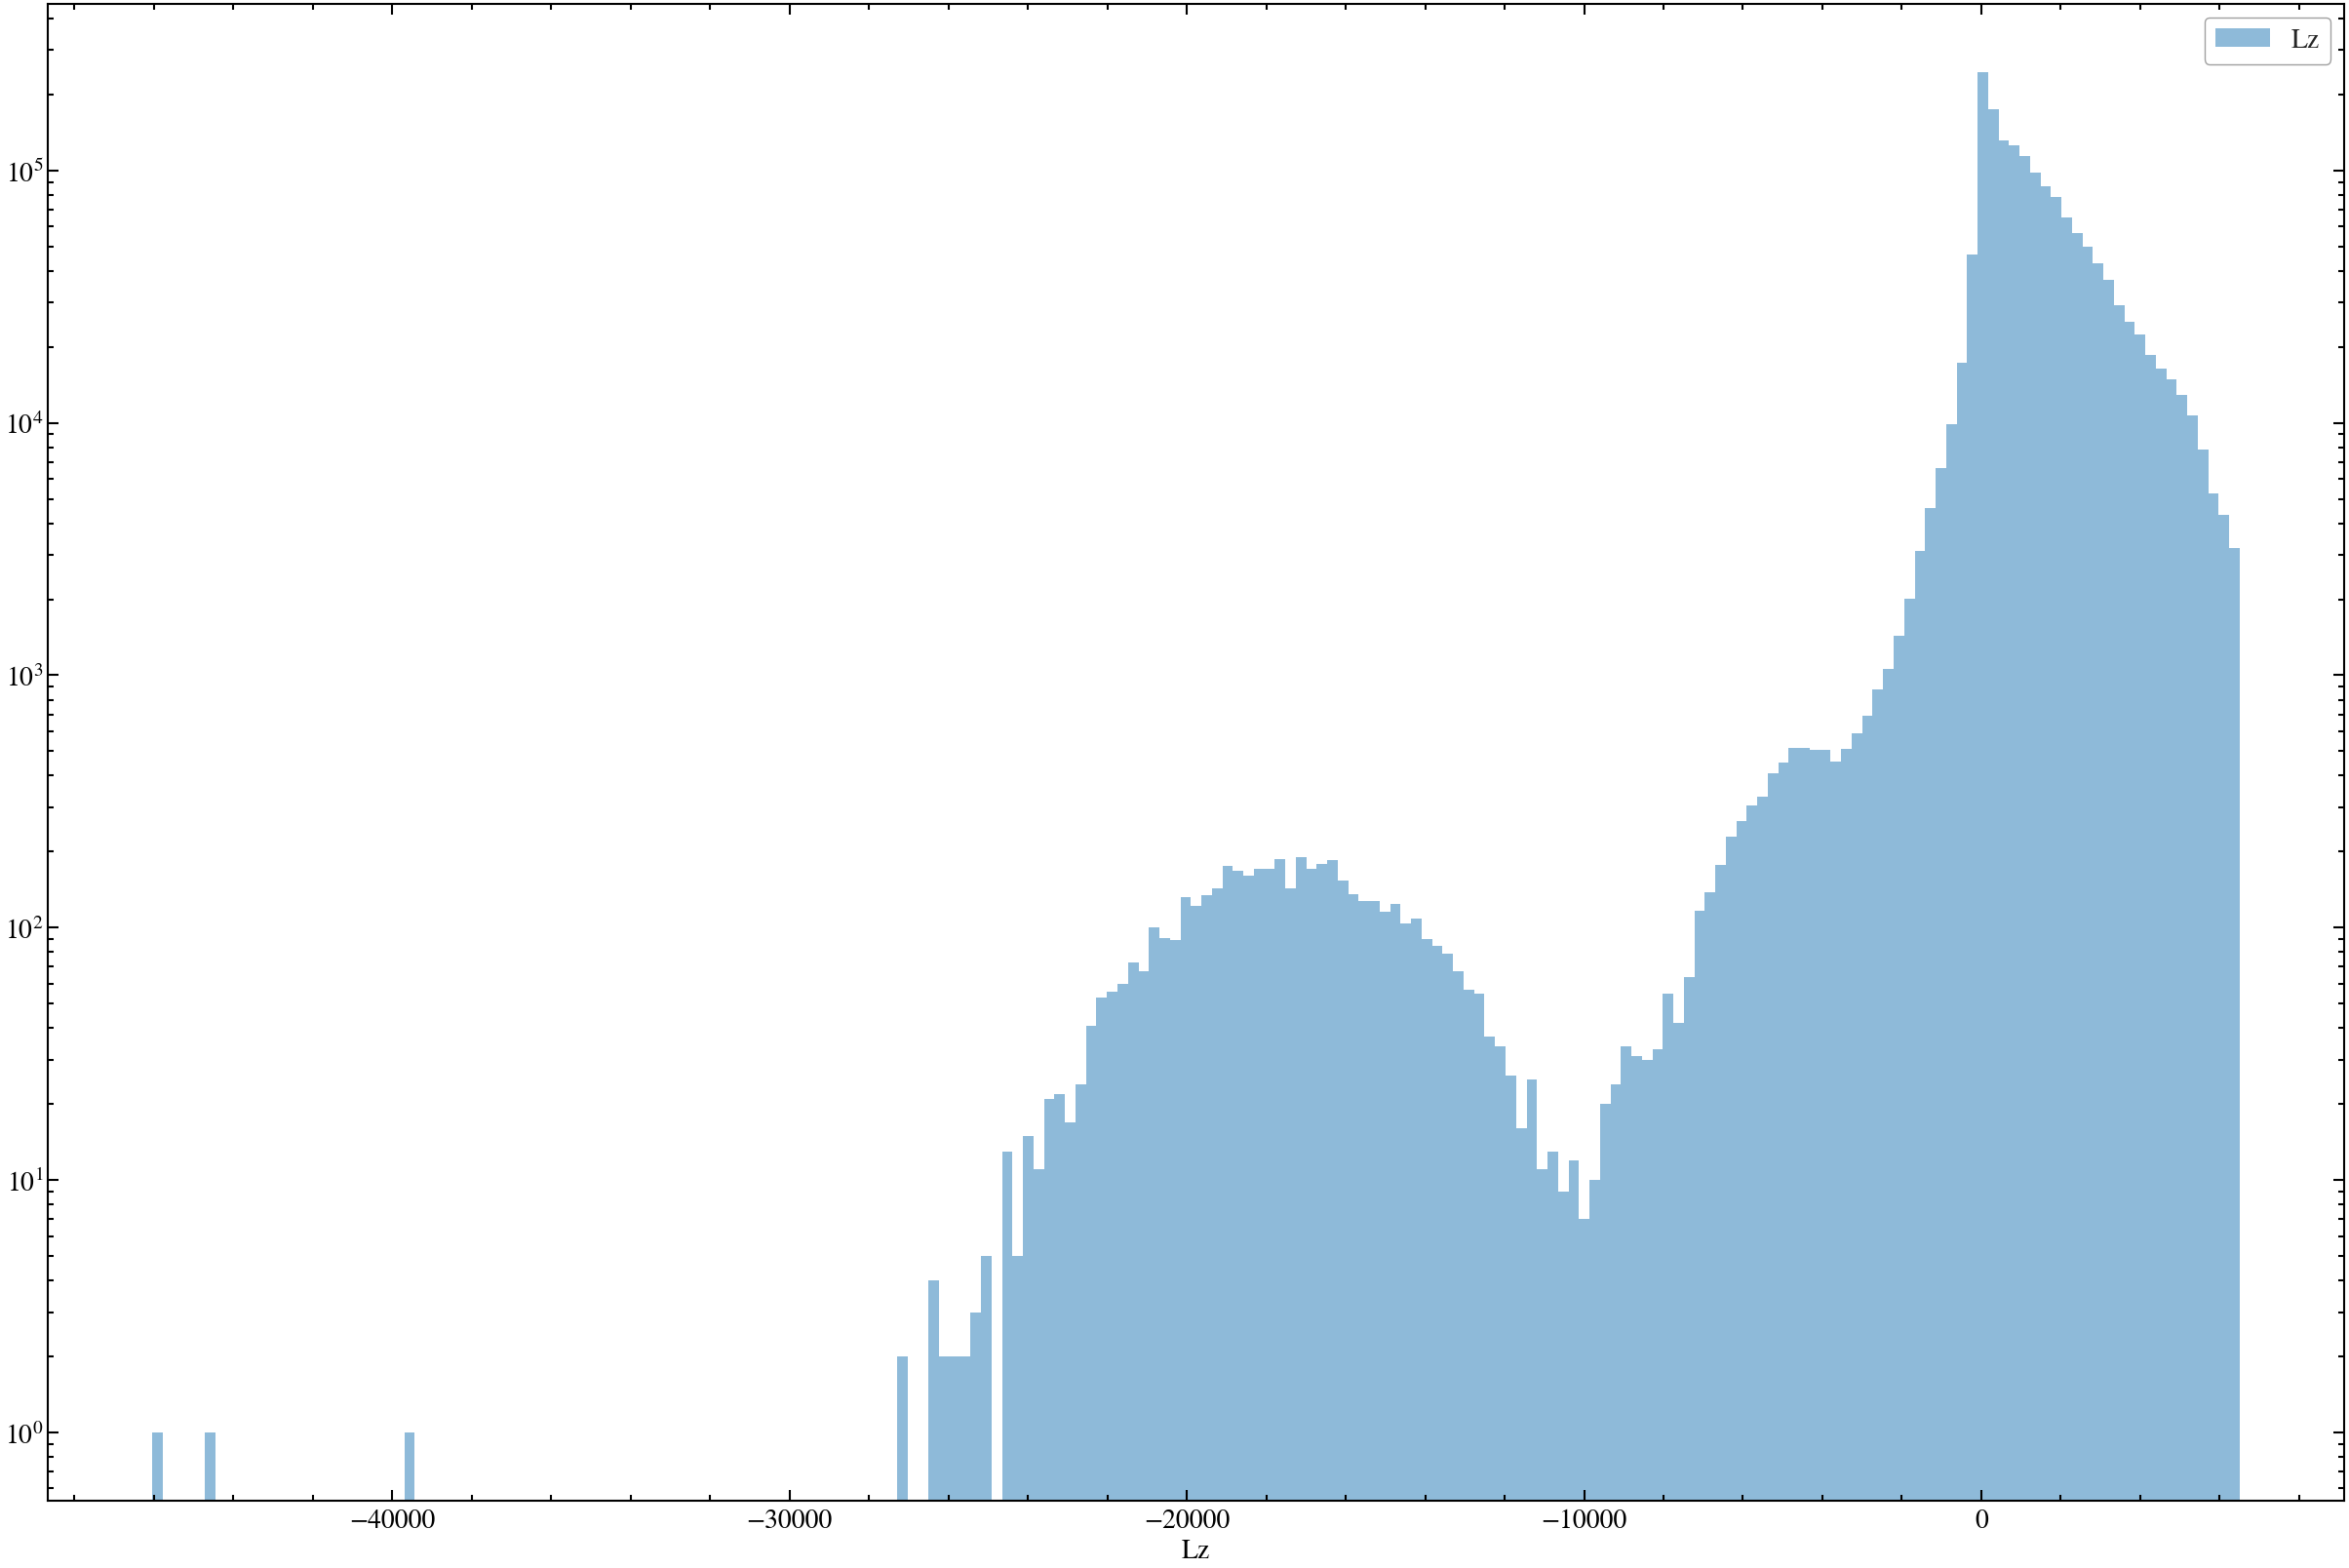

Calculating just Actions...
Calculated!


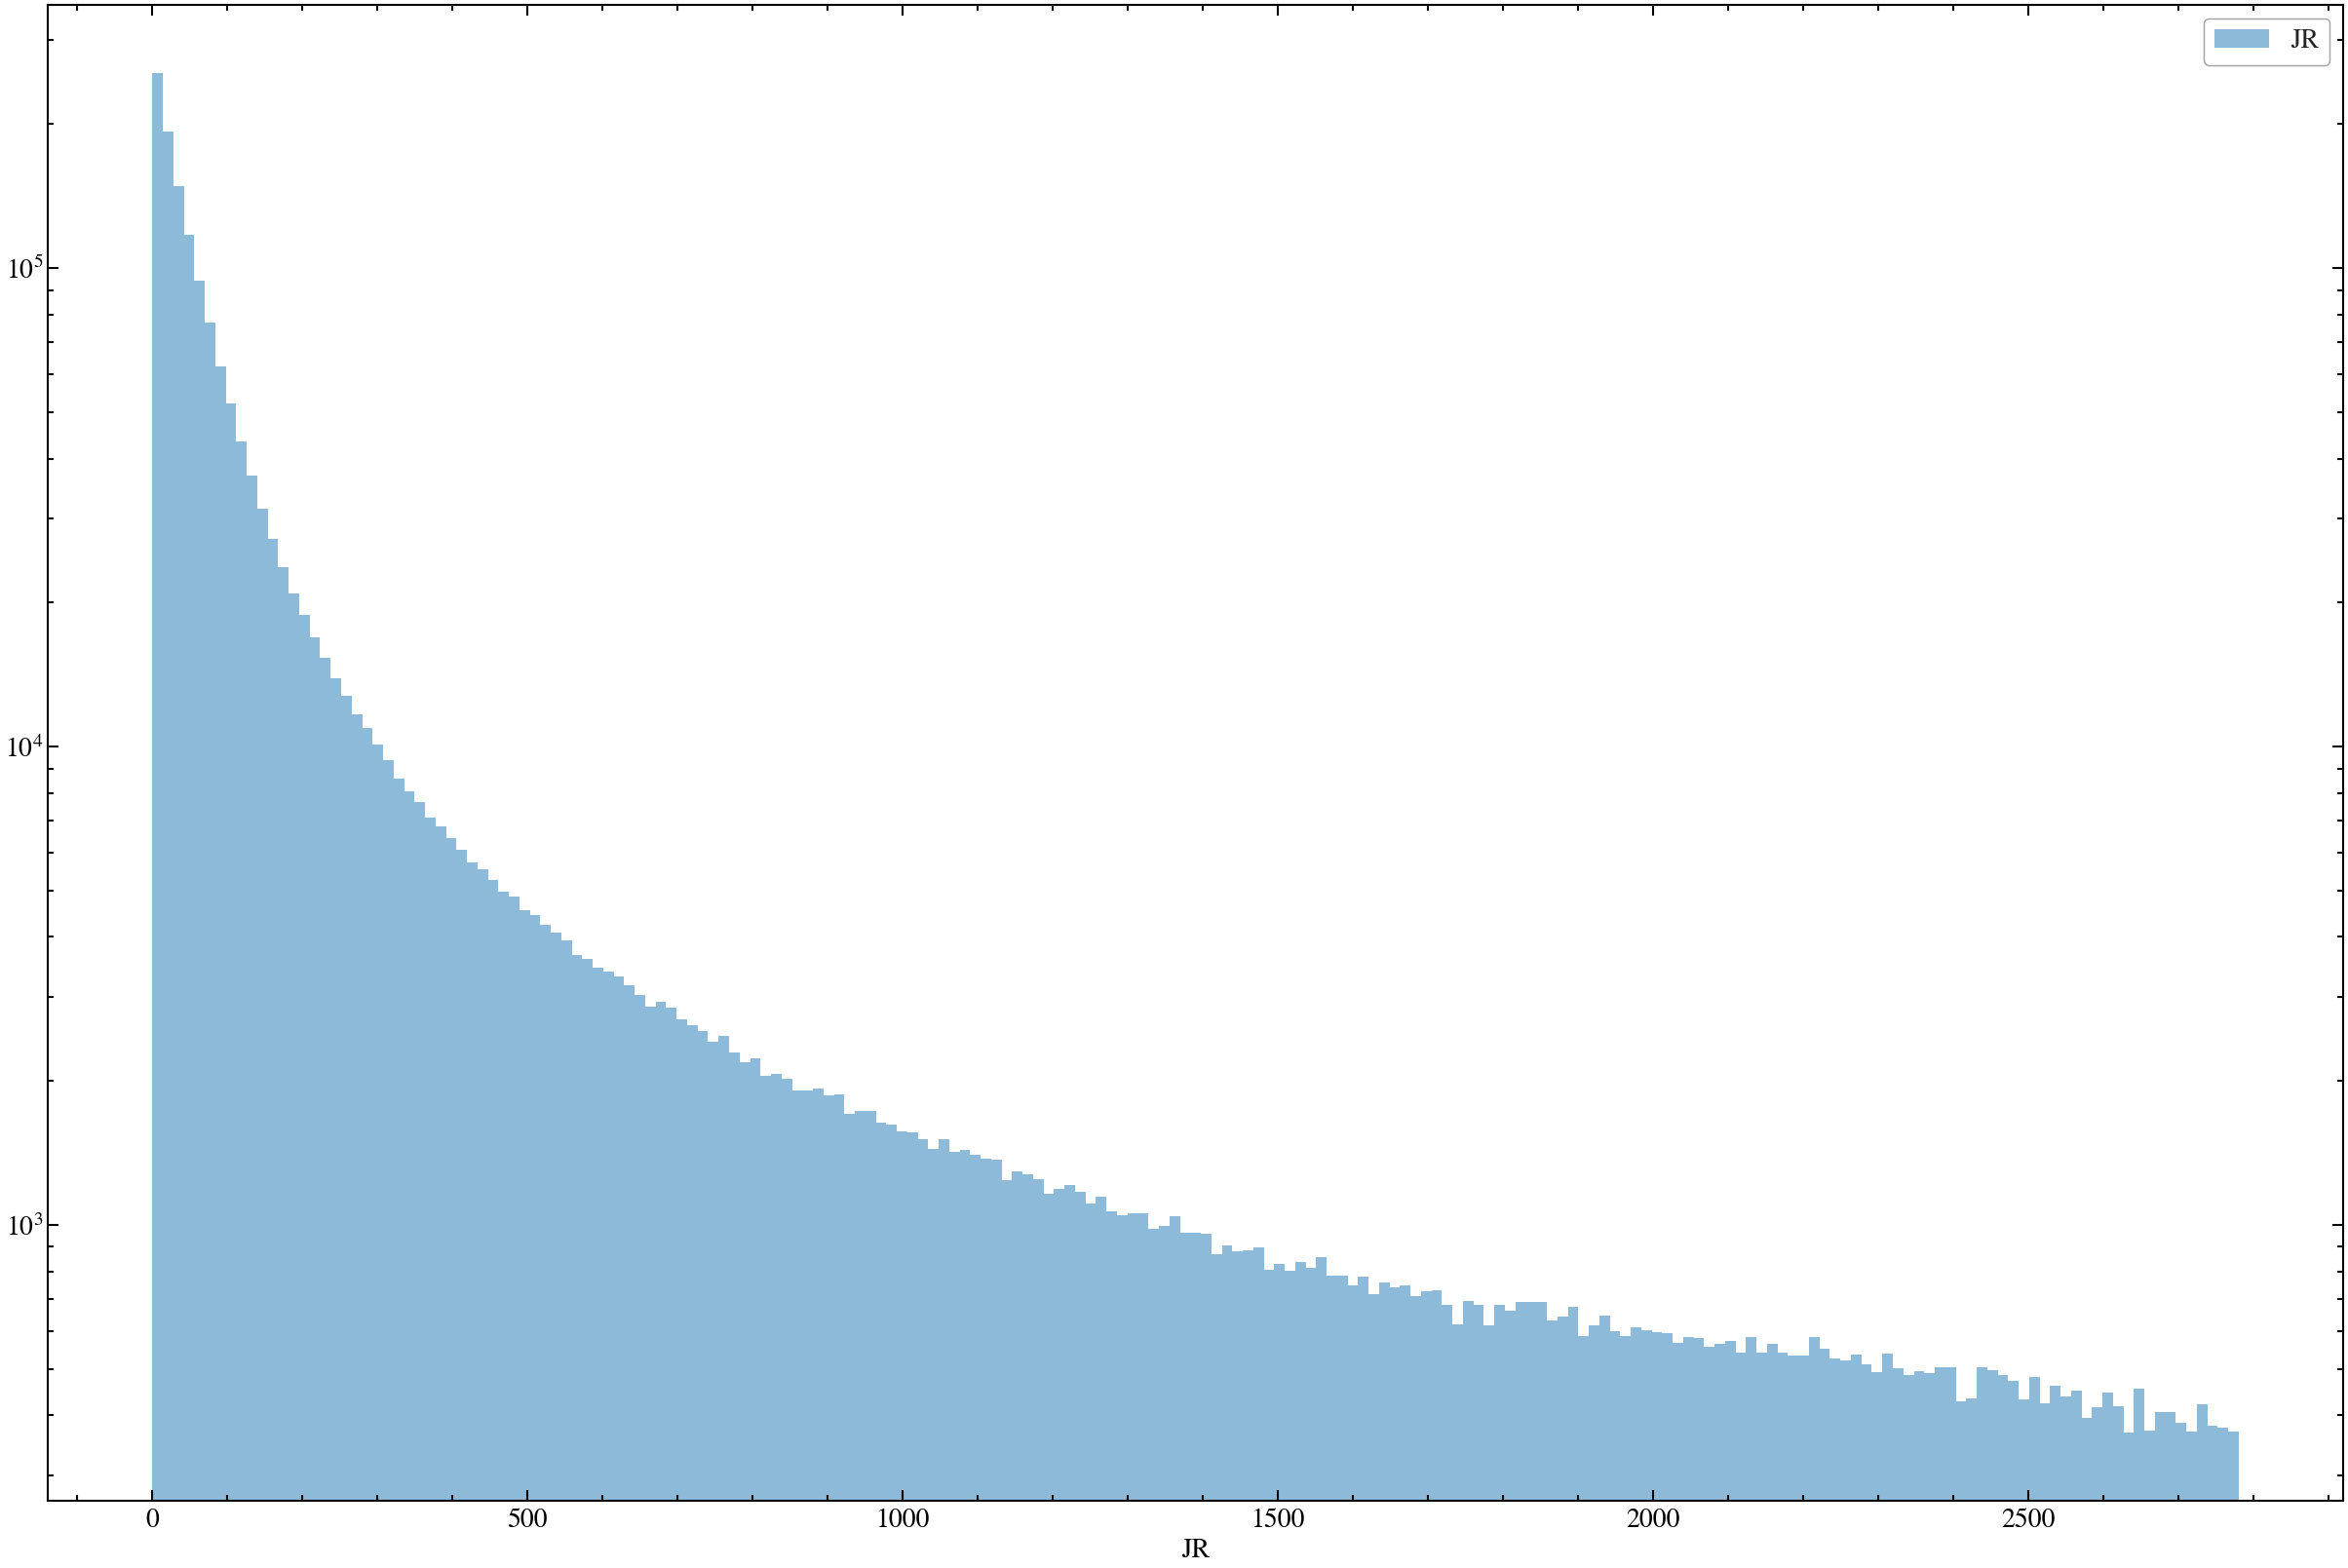

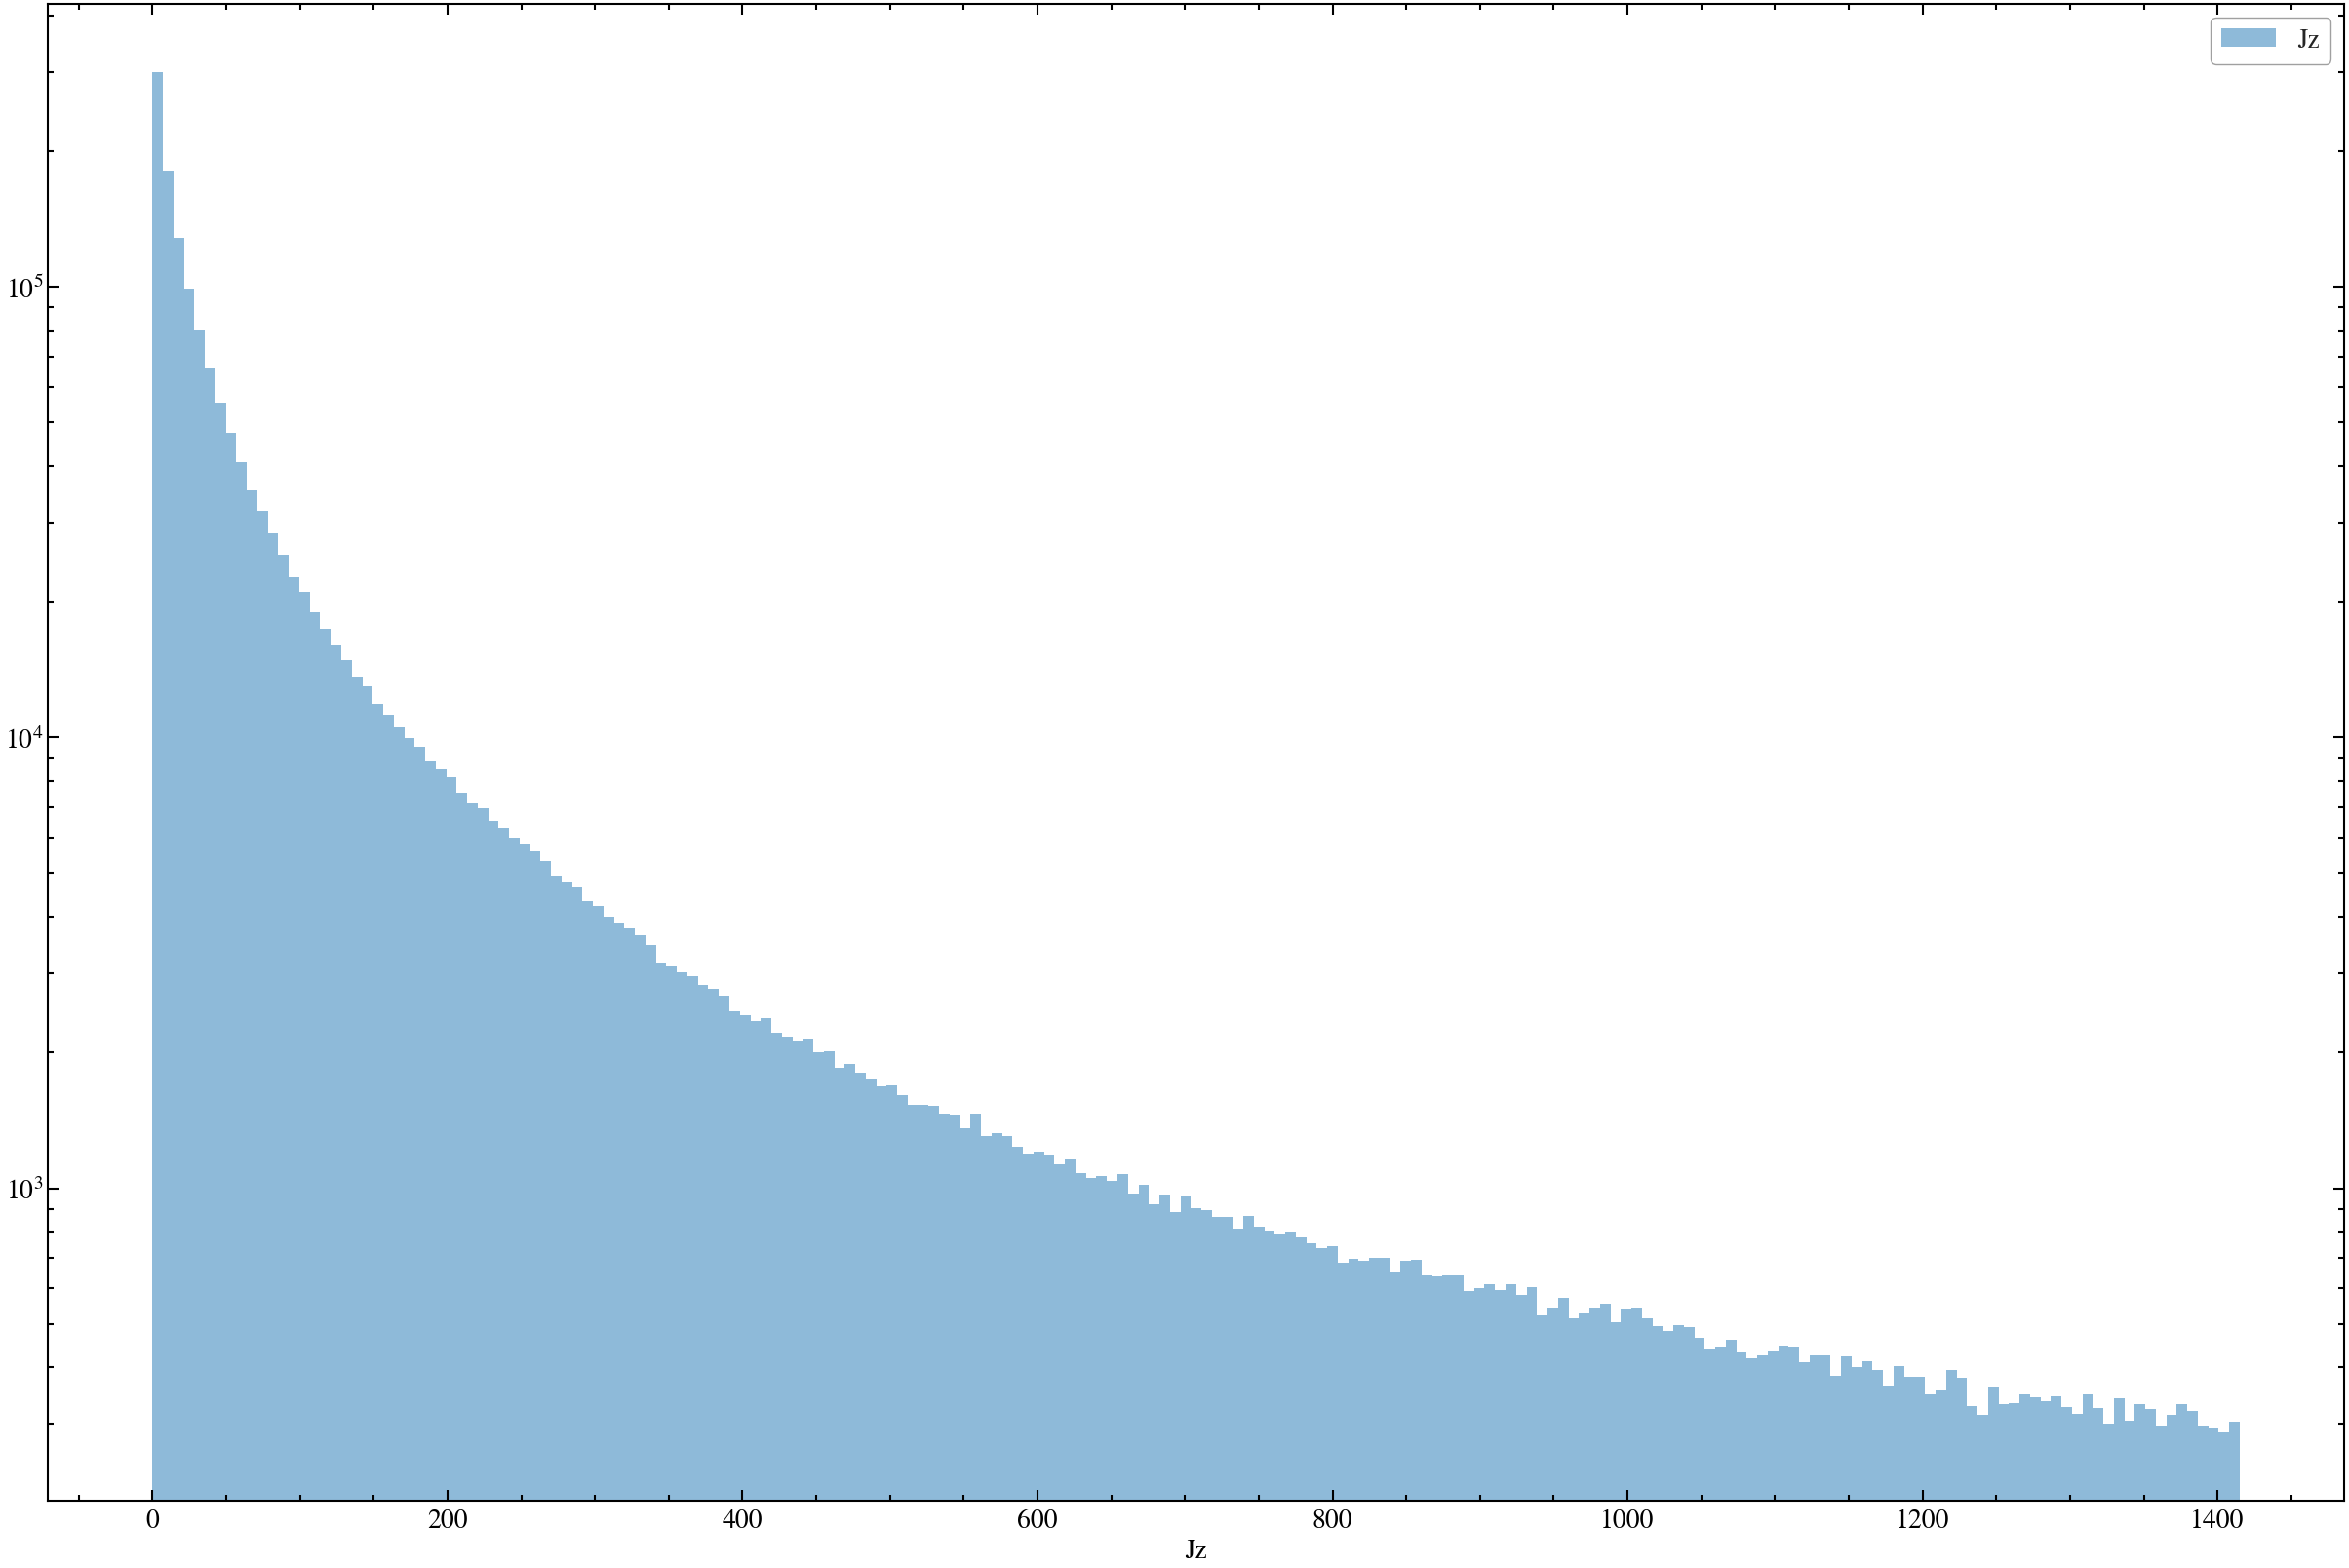

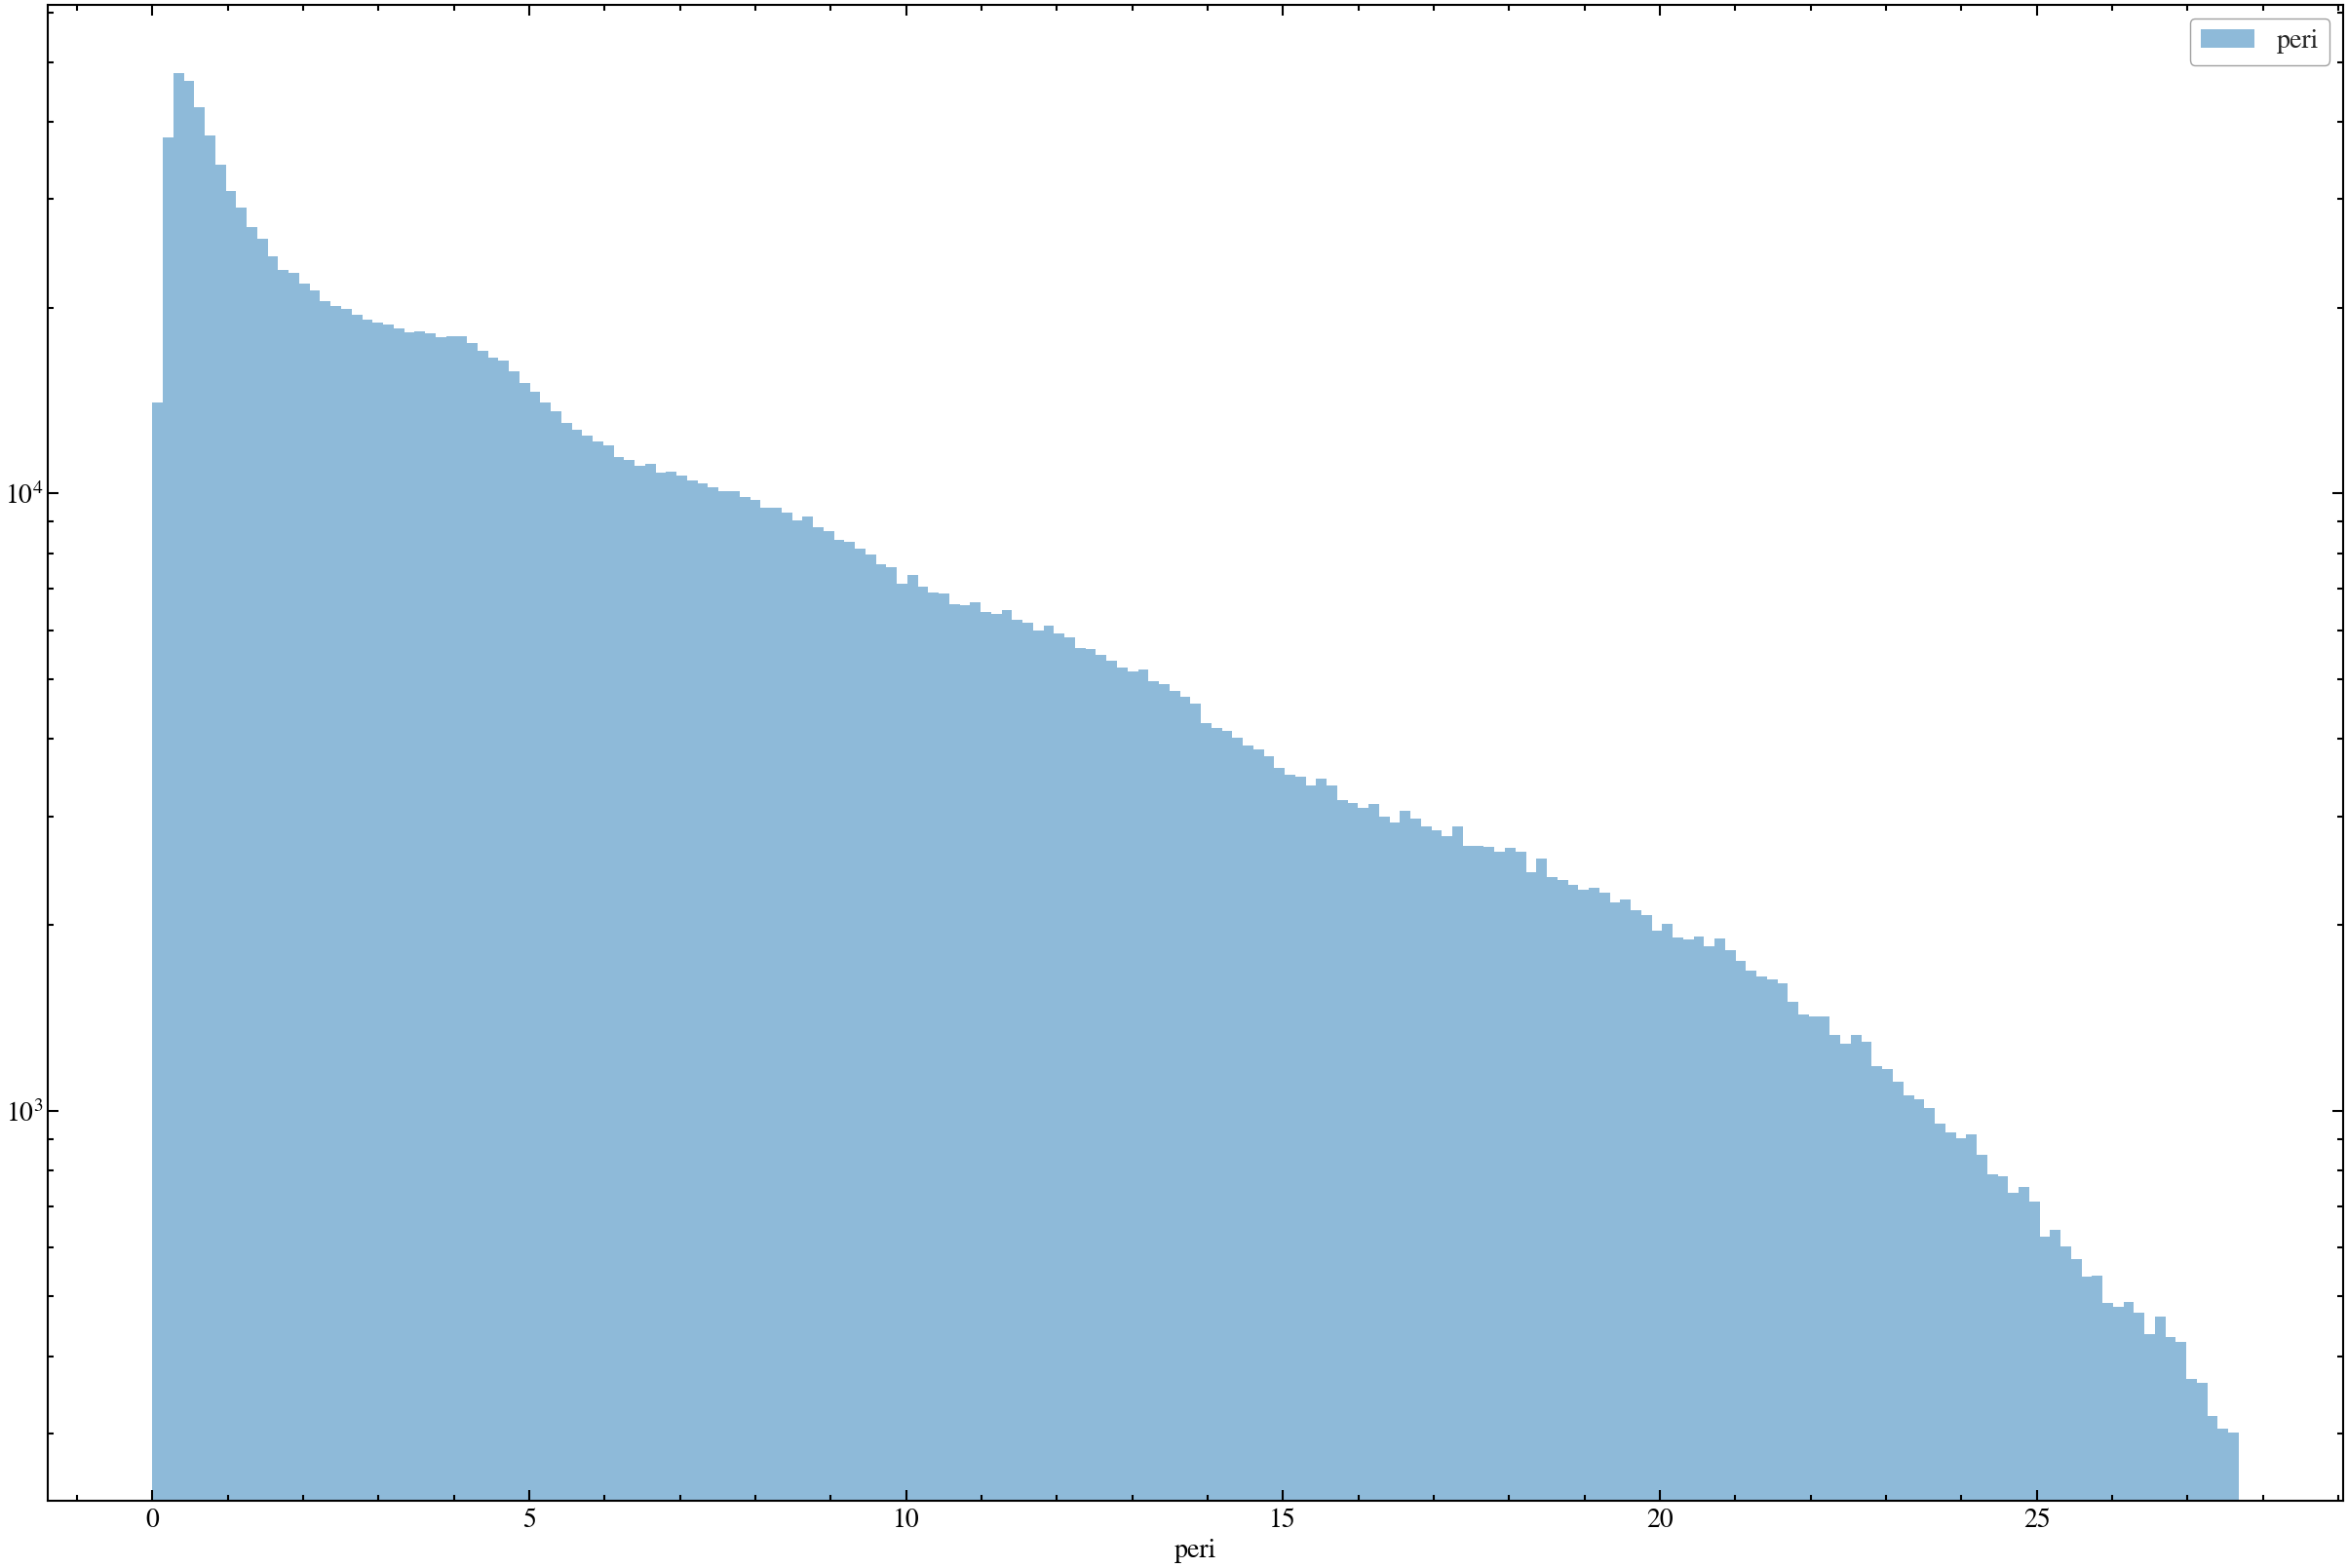

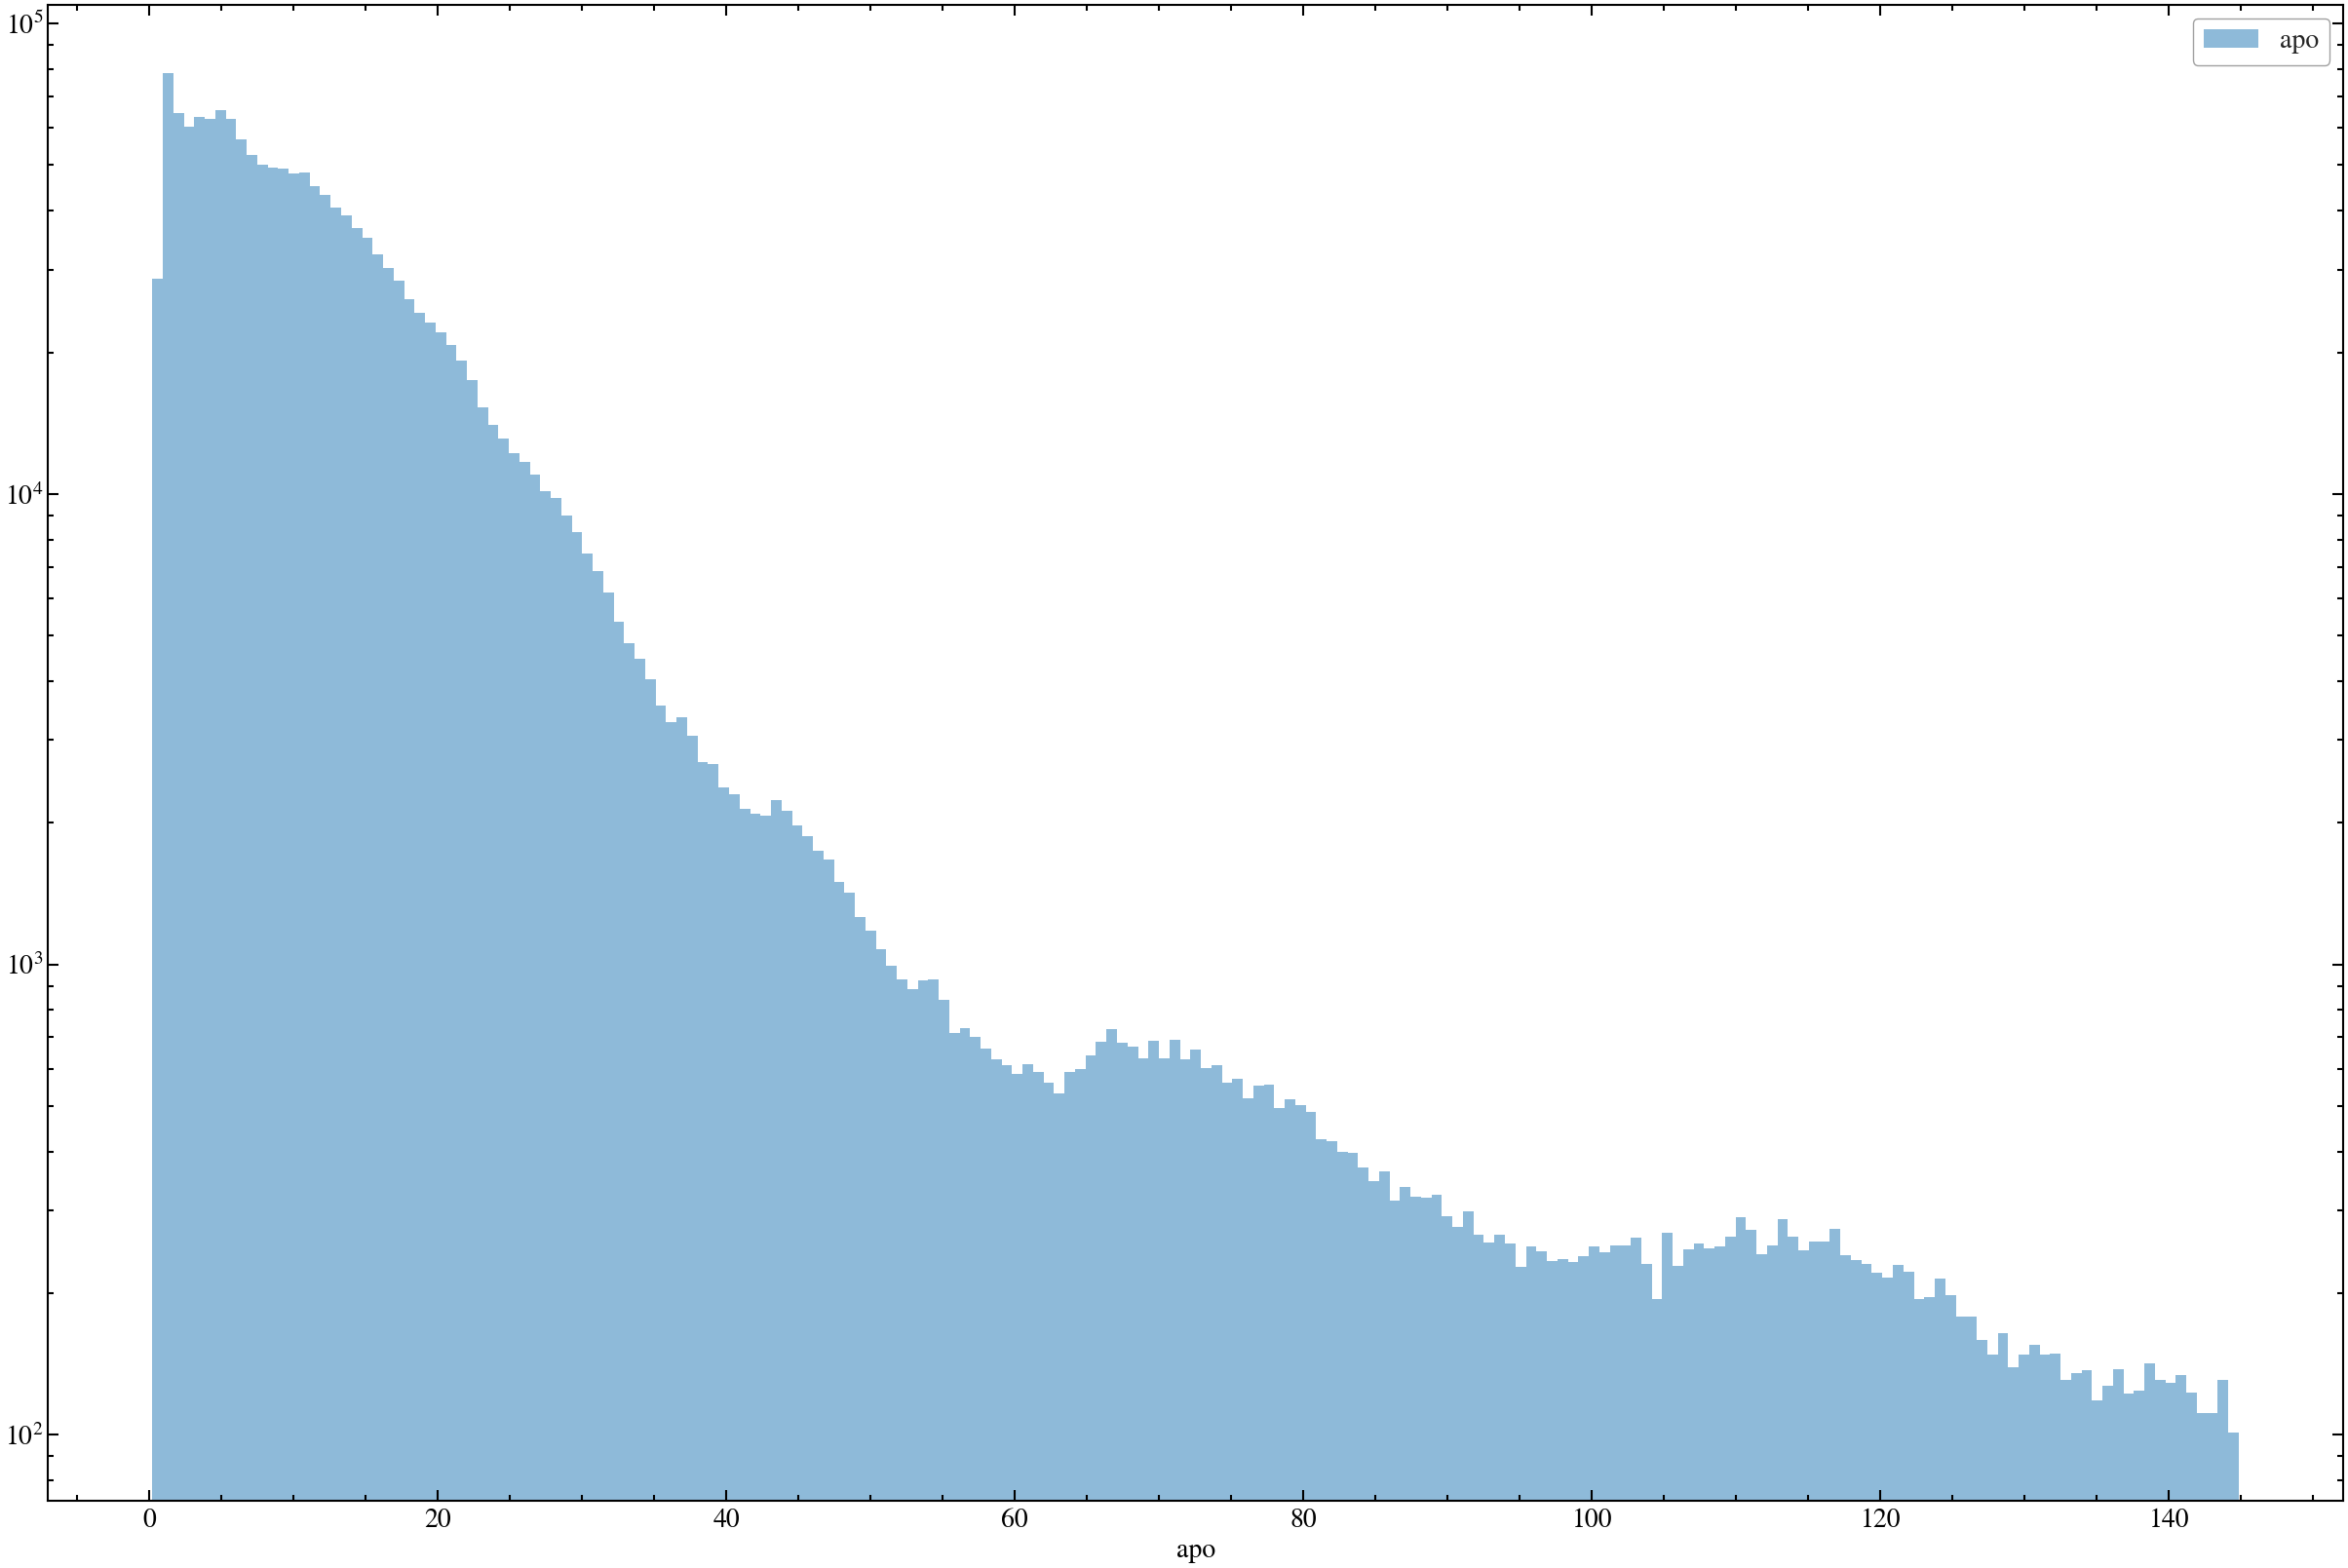

In [9]:
for xkey in ["Fe_H","En","E_sim","Lz","JR","Jz","peri","apo"]:
    x = stars[xkey].v
    min_x,max_x = np.nanpercentile(x,[0,95])
    bins = np.linspace(min_x,max_x,200)
    plt.figure()
    plt.hist(x,bins=bins,alpha=0.5,label=xkey)
    plt.legend()
    plt.yscale("log")
    plt.xlabel(xkey)
    plt.show()

## Galactic Potential
This package automatically calculates and saves an axisymmetric AGAMA potential, assuming the default orientation. This is used for dynamical quantities, such as actions. The "En" key is calculatted with this, "E_sim" is using the original gadget potential

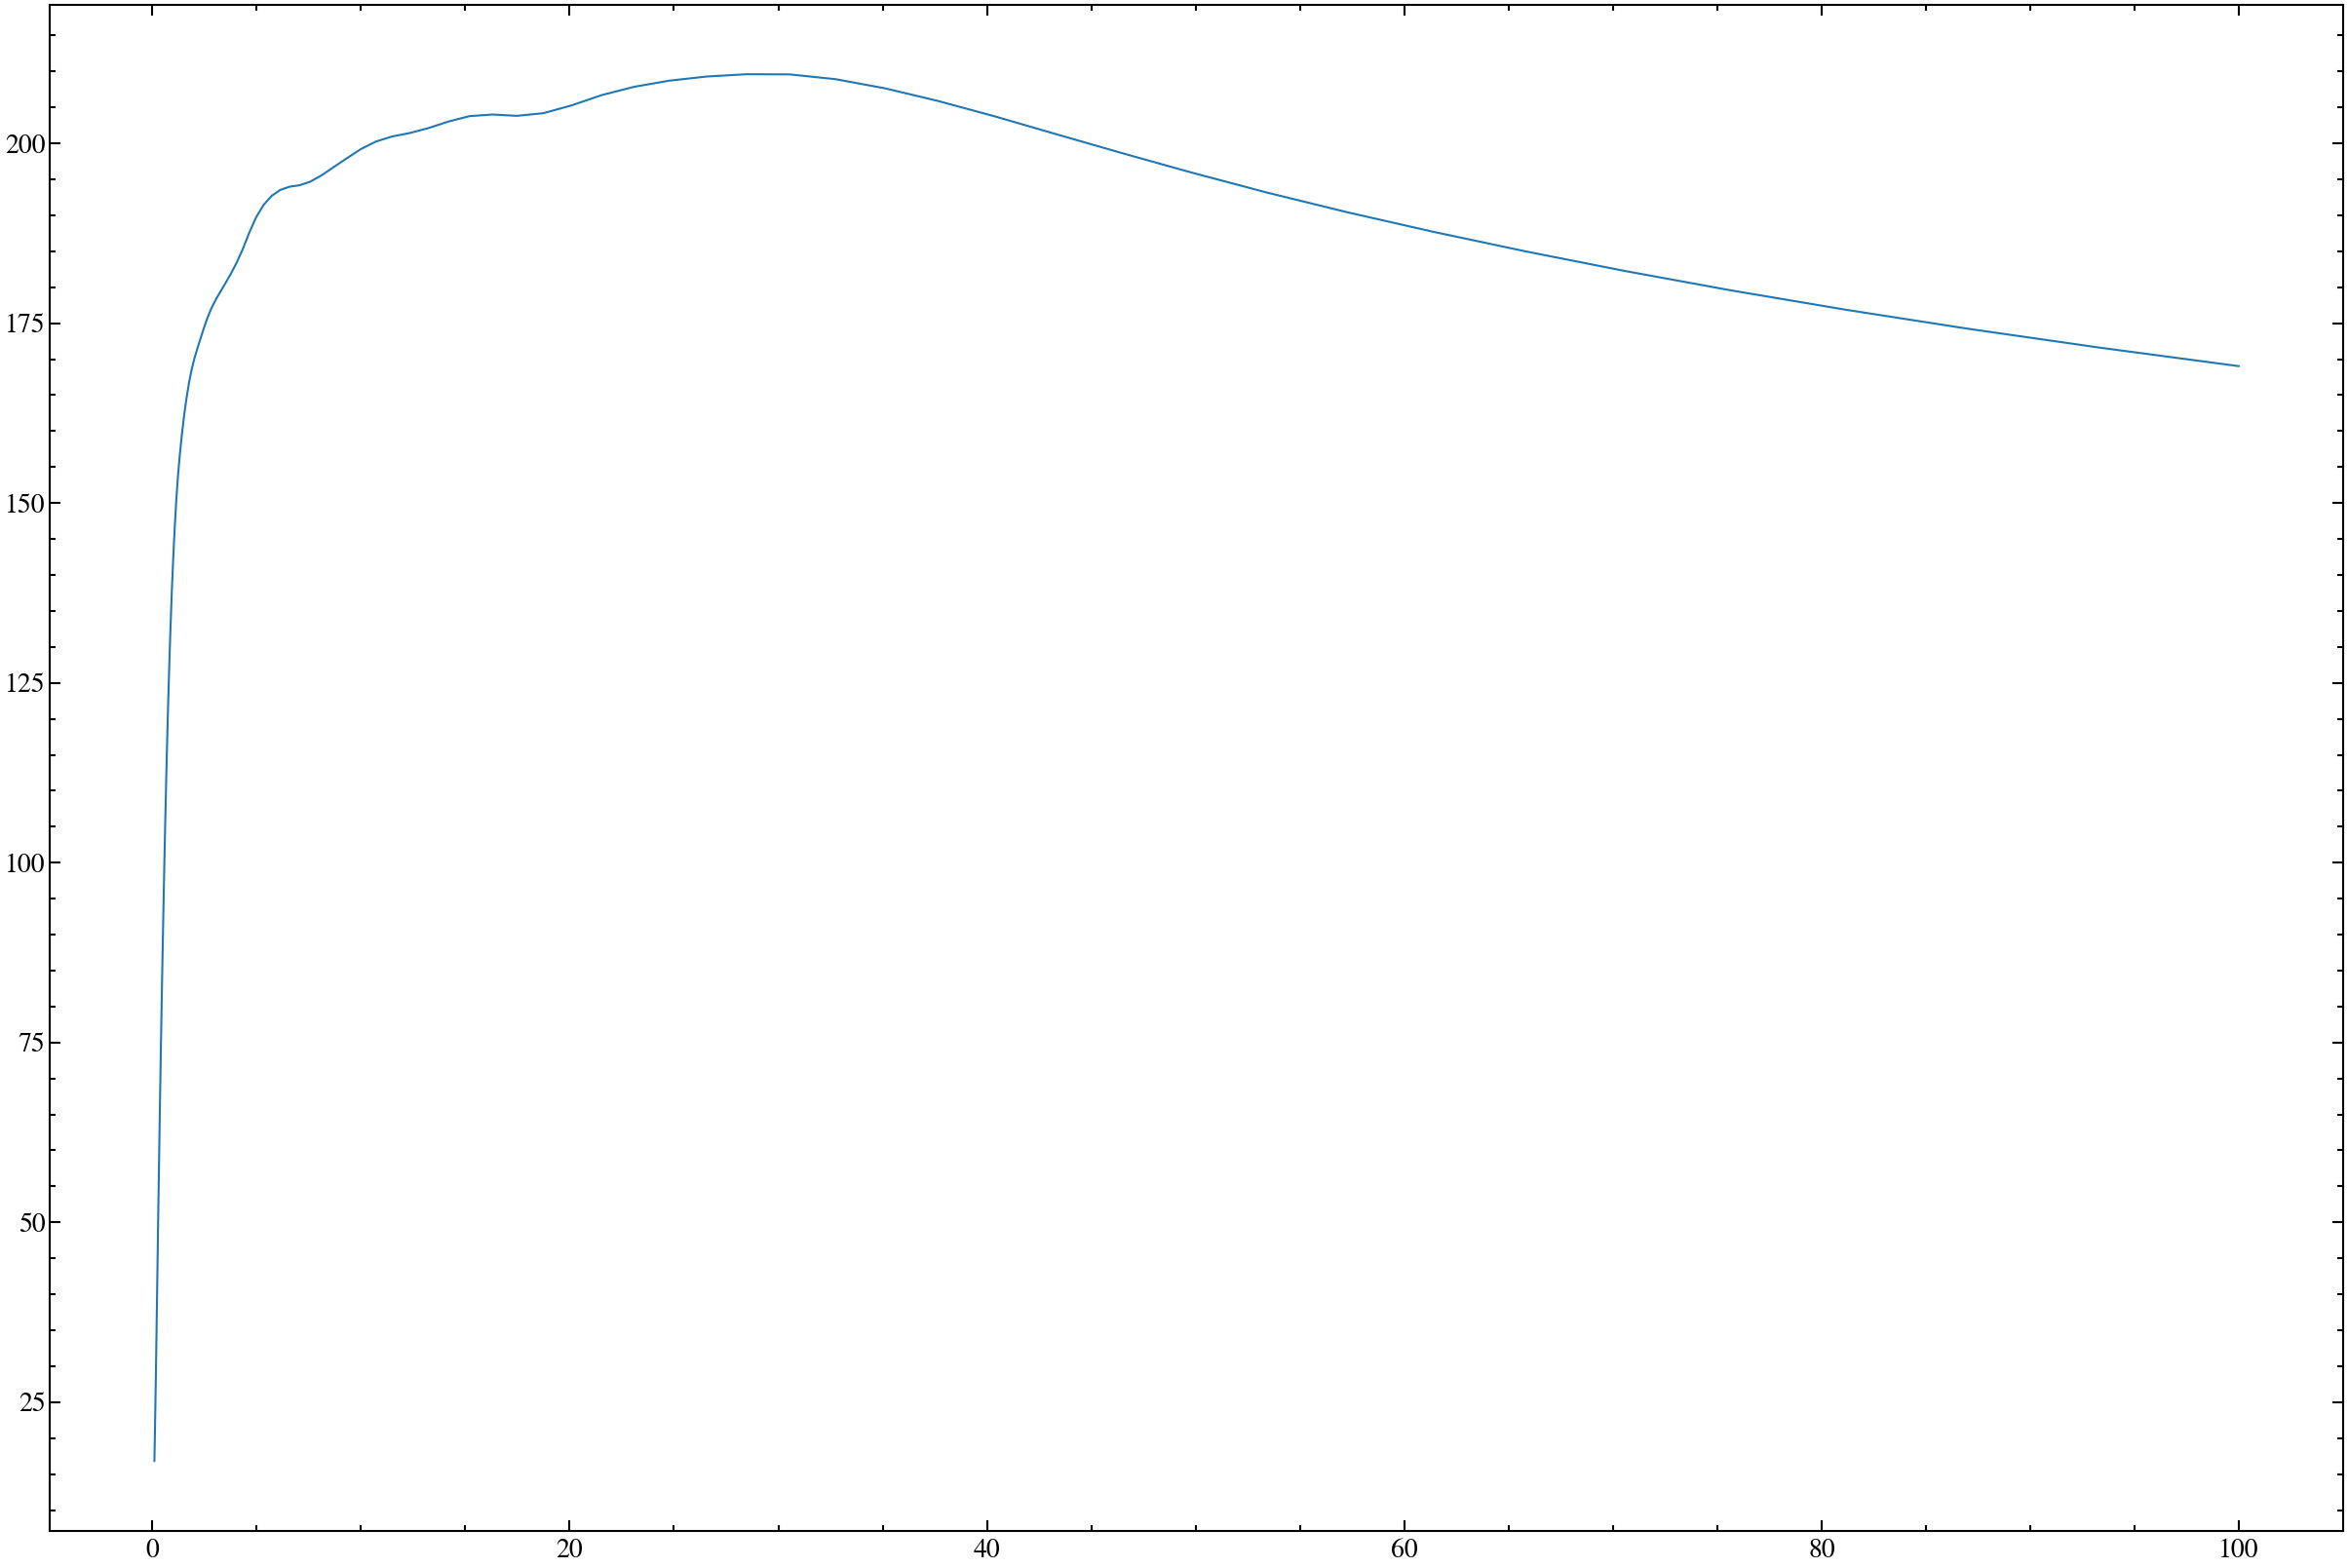

In [10]:
pot = Au6.potential

rspace = np.geomspace(0.1,100,100)
pos_space=np.column_stack([rspace,0*rspace,0*rspace])
vc_space = np.sqrt(-rspace*pot.force(pos_space)[:,0])

plt.figure()
plt.plot(rspace,vc_space)
plt.show()

## Merger Tree
Using old scripts. Could update to Tangos/Pynbody?

## Particle Origin
Two options, both based on current merger trees and accretion defs. 

First based on "touch", the contents of a subhalo when first touches the main halo.

Second based on "Birth" location of star (TBD)


In [11]:
a_ind = stars["touch_a_ind"]

In [12]:
Lz = stars["Lz"].v
En = stars["En"].v

In [13]:
a_groups, a_pops = np.unique(a_ind,return_counts=True)

In [14]:
large_a_groups = a_groups[a_pops>500]

In [15]:
print(large_a_groups)

[-99  -1   0   2   3   4   5   6   7   9  10]


-99 1480418
-1 85705


/tmp/ipykernel_58291/2321210170.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(cent_x,cent_y,m_hist.T,label="Insitu",zorder=10)


0 31570
2 15165
3 9937
4 13475
5 9484
6 3097
7 10730
9 855
10 837


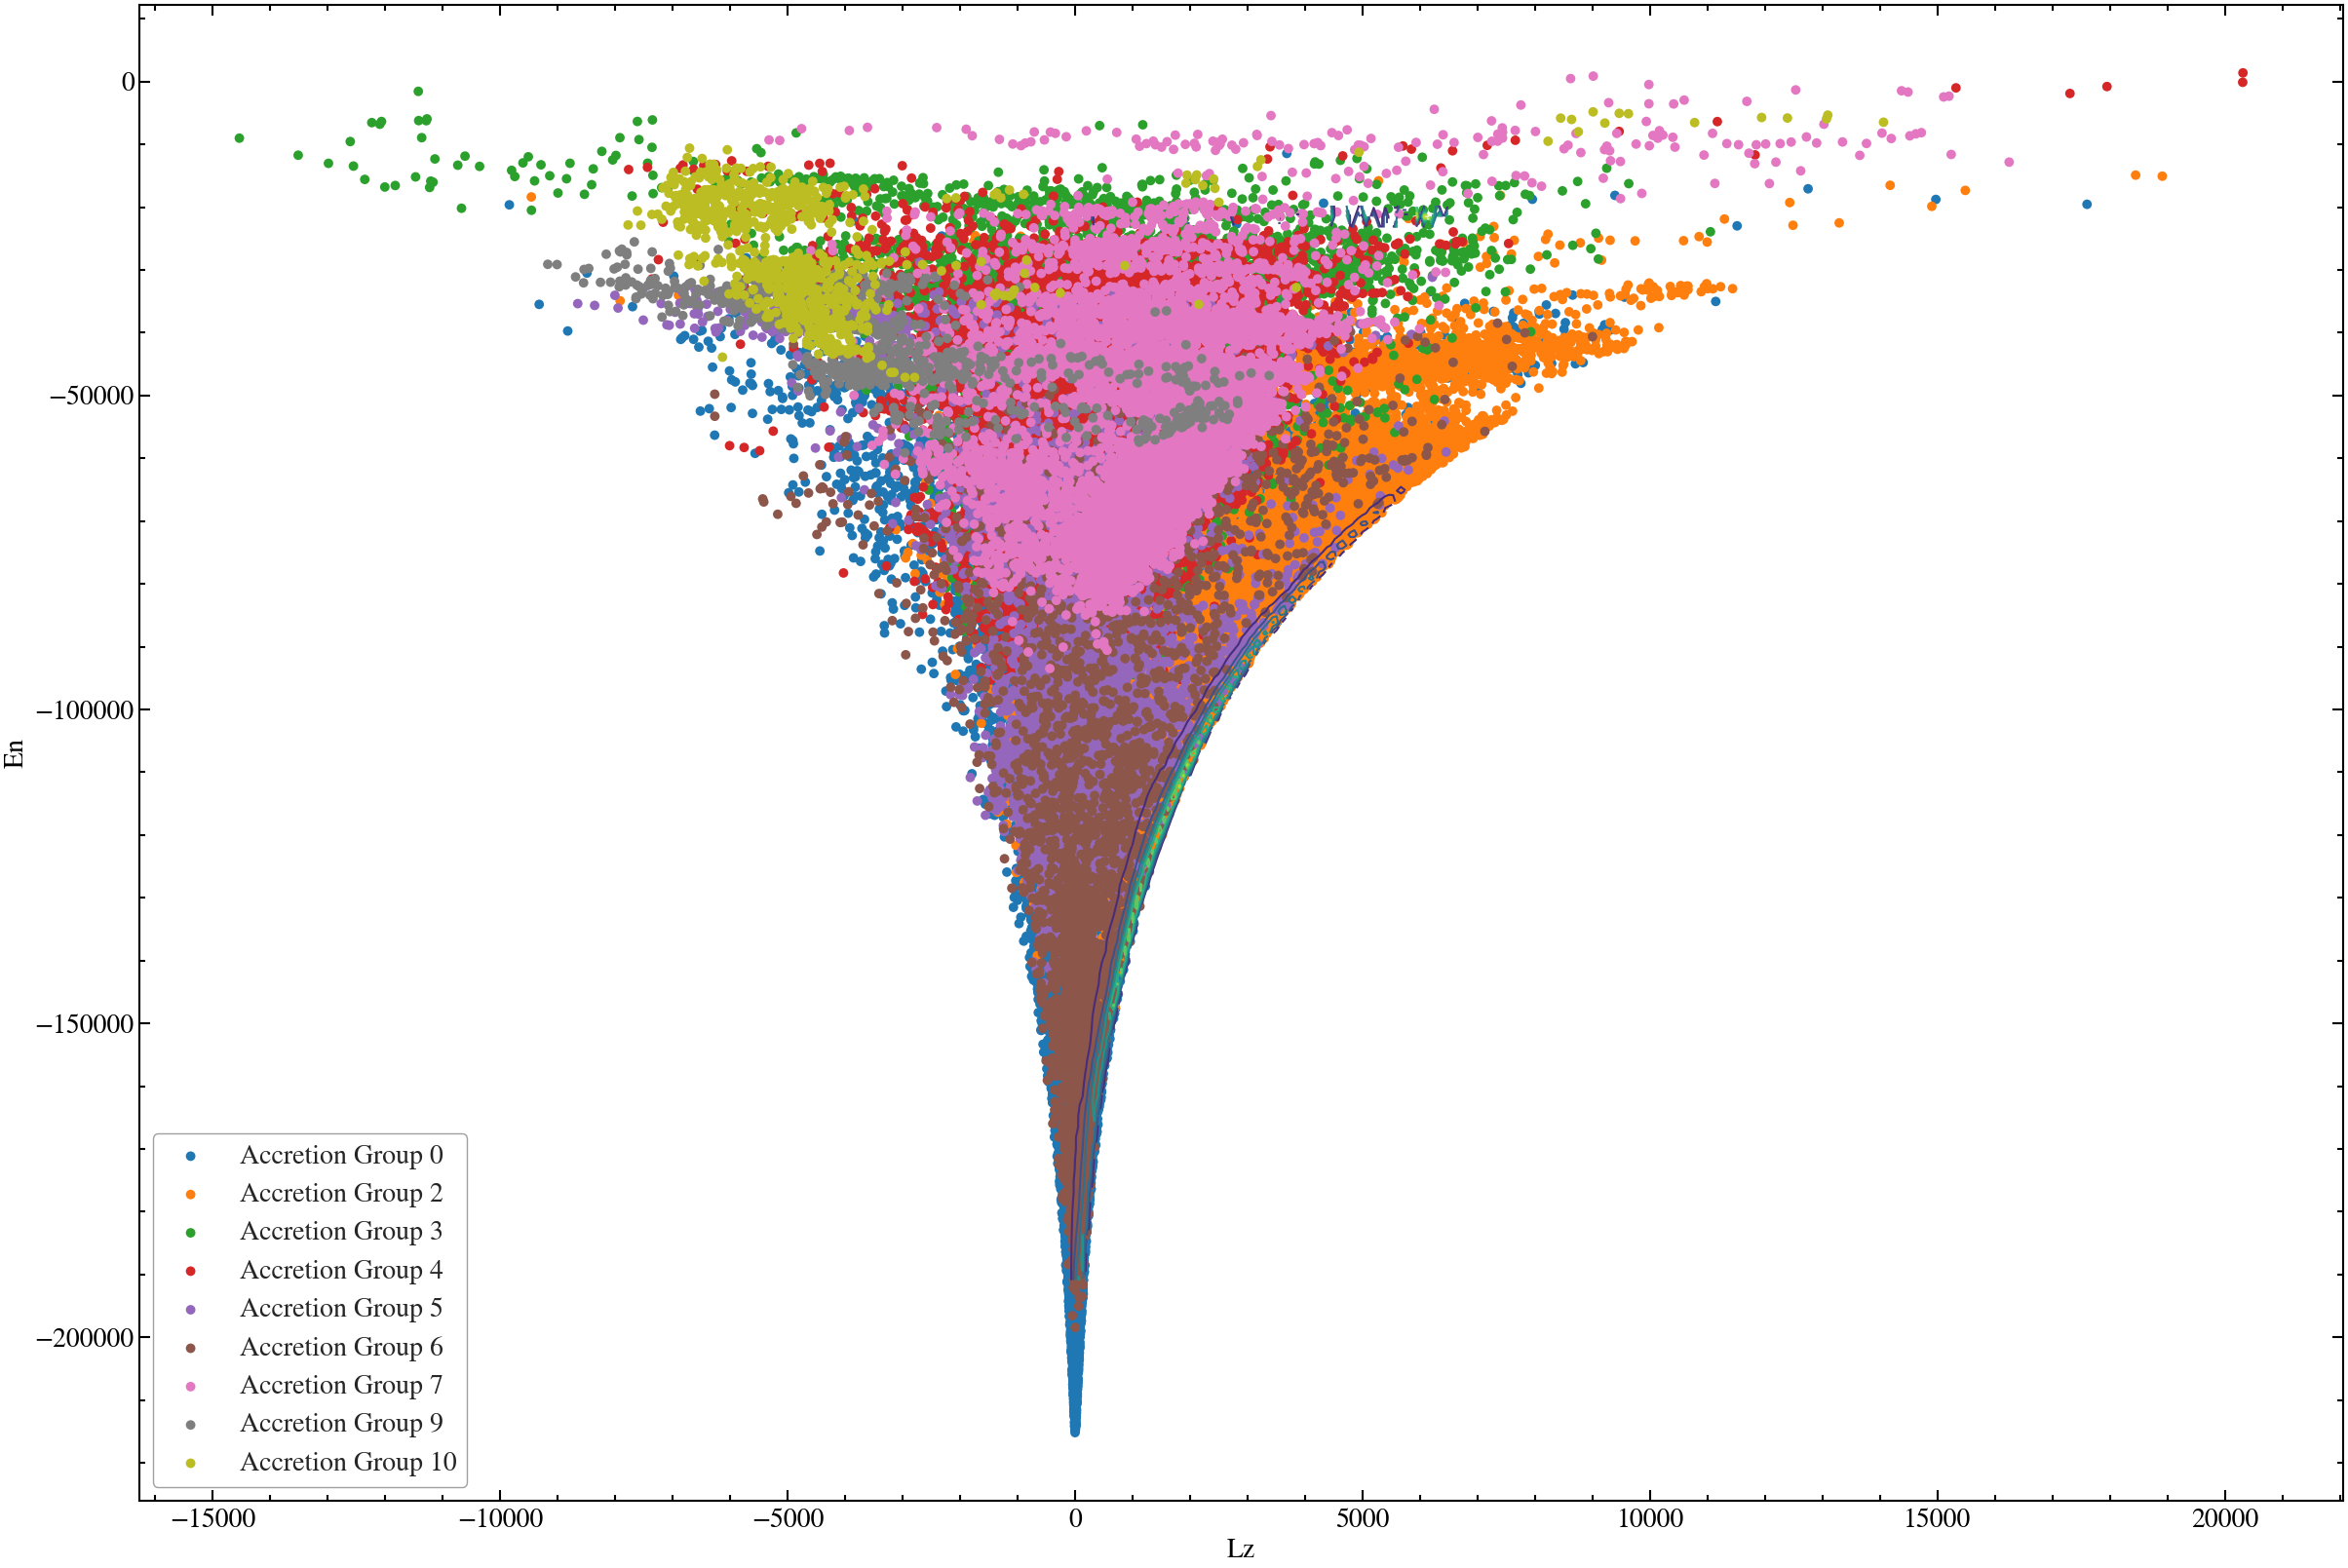

In [16]:
percent=5
nbin=100
binsx = np.linspace(*np.nanpercentile(Lz,[percent,100-percent]),nbin)
binsy = np.linspace(*np.nanpercentile(En,[percent,100-percent]),nbin)
plt.figure()
for a_G_ind in large_a_groups:
    a_filt= a_ind ==a_G_ind
    print(a_G_ind,a_filt.sum())
    if a_G_ind<0:
        hist = np.histogram2d(Lz[a_filt],En[a_filt],bins=(binsx,binsy))[0]
        m_hist = np.ma.masked_where(hist==0,hist)
        cent_x = 0.5*(binsx[1:]+ binsx[:-1])
        cent_y = 0.5*(binsy[1:]+ binsy[:-1])
        plt.contour(cent_x,cent_y,m_hist.T,label="Insitu",zorder=10)
    else:
        plt.scatter(Lz[a_filt],En[a_filt],label=f"Accretion Group {a_G_ind}",
                   edgecolors="none",s=50)
plt.xlabel("Lz")
plt.ylabel("En")
plt.legend()
plt.show()

### Birth Subhalo  
TODO

Got the scripts, just need to package them